# CS316 Project - Introduction to AI and Data Science

## Group Information
---
**Group Members:**
* Faisal Alghamdi - 221110726
* Faisal Alfaraj - 222110025
* Ali alkhalidy - 222111397

**Project Topic:** Sustainable Agriculture: Leveraging AI for Crop Yield Optimization and Pest Detection

## Section 1: Problem Definition
---
### Instructions
In this section, you must:
1. Define your research questions (minimum 3 questions)
2. Explain how your project aligns with UN Sustainable Development Goals (SDGs)
3. Identify the specific problem you're addressing
4. Describe the potential impact of your solution

**Research Questions Example Format:**
* RQ1: How does [variable X] affect [sustainability outcome Y]?
* RQ2: What is the relationship between [factor A] and [factor B] in [your domain]?
* RQ3: Can we predict [sustainability metric] using [available data]?

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
mrigaankjaswal_crop_yield_prediction_dataset_path = kagglehub.dataset_download('mrigaankjaswal/crop-yield-prediction-dataset')

print('Data source import complete.')



Data source import complete.


In [ ]:
# This command installs the 'scikeras' library, which provides an interface between scikit-learn and Keras,
# allowing deep learning models to be used with scikit-learn's pipelines and tools.
# It also installs the 'catboost' library, a gradient boosting library developed by Yandex,
# which is particularly efficient for categorical data.
!pip install scikeras catboost

In [ ]:
# Section 1: Problem Definition

# Import necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import (
    train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
)
from sklearn.metrics import (
    r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
)
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import time  # For tracking training time
import os
import warnings  # For suppressing warnings

# Suppress convergence and runtime warnings for cleaner output
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)
warnings.filterwarnings(action='ignore', category=RuntimeWarning)

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Ensure plots are displayed in the notebook
%matplotlib inline

def document_problem():
    """
    Document the problem definition and SDG alignment.

    This function outlines the research questions, explains the project's alignment with
    the UN Sustainable Development Goals (SDGs), identifies the specific problem being addressed,
    and describes the potential impact of the solution.

    Assumptions:
    - The function is called in an environment that supports print statements.
    """
    # Research Questions
    print("Research Questions:")
    print("1. How does average rainfall affect crop yield across different regions and crop types?")
    print("2. What is the relationship between pesticide usage and crop productivity while maintaining environmental sustainability?")
    print("3. Can we predict crop yields using environmental data such as soil conditions, rainfall, and temperature?")

    # SDG Alignment
    print("\nAlignment with UN Sustainable Development Goals (SDGs):")
    print("SDG 2 (Zero Hunger): Enhances food security by optimizing crop yields and reducing losses due to pests or diseases.")
    print("SDG 12 (Responsible Consumption and Production): Promotes efficient resource use and reduces reliance on synthetic fertilizers.")
    print("SDG 13 (Climate Action): Aids in climate-resilient farming practices through actionable insights.")

    # Problem Overview
    print("\nProblem Overview:")
    print("Modern agriculture heavily relies on synthetic fertilizers and pesticides, causing environmental harm.")
    print("This project aims to provide farmers with actionable insights for optimized resource use, balancing productivity and sustainability.")

    # Potential Impact
    print("\nPotential Impact:")
    print("- Farmers: Improved productivity and reduced costs through data-driven insights.")
    print("- Environment: Reduced chemical usage and optimized resource allocation.")
    print("- Communities: Enhanced food security through sustainable practices.")

# Run the problem documentation
document_problem()


Research Questions:
1. How does average rainfall affect crop yield across different regions and crop types?
2. What is the relationship between pesticide usage and crop productivity while maintaining environmental sustainability?
3. Can we predict crop yields using environmental data such as soil conditions, rainfall, and temperature?

Alignment with UN Sustainable Development Goals (SDGs):
SDG 2 (Zero Hunger): Enhances food security by optimizing crop yields and reducing losses due to pests or diseases.
SDG 12 (Responsible Consumption and Production): Promotes efficient resource use and reduces reliance on synthetic fertilizers.
SDG 13 (Climate Action): Aids in climate-resilient farming practices through actionable insights.

Problem Overview:
Modern agriculture heavily relies on synthetic fertilizers and pesticides, causing environmental harm.
This project aims to provide farmers with actionable insights for optimized resource use, balancing productivity and sustainability.

Potentia

## Section 2: Data Collection & Preparation
---
### Instructions
Document your data source(s) and prepare your dataset:
1. **Data Source Documentation:**
   * Dataset name and source
   * Time period covered
   * Number of records and features
   * Data collection methodology

2. **Initial Data Assessment:**
   * Run and document basic statistics
   * Check for missing values
   * Identify potential data quality issues

In [ ]:
# Section 2: Data Collection & Preparation

def load_dataset(dataset_path):
    """
    Load the dataset and perform initial assessment.

    Parameters:
    - dataset_path (str): The path to the dataset file.

    Returns:
    - df (pd.DataFrame): The loaded dataset as a pandas DataFrame.

    Raises:
    - FileNotFoundError: If the CSV file is not found in the provided path.
    - Exception: For any other exceptions during file reading.

    Assumptions:
    - The dataset file is in CSV format.
    - The dataset contains numerical columns that can be converted to float32 later.

    Data Collection Methodology:
    - The dataset was sourced from Kaggle, provided by Mrigaank Jaswal.
    - It contains historical data on crop yields, rainfall, temperature, and pesticide usage from 1990 to 2013.
    - The data was collected from agricultural records and meteorological data sources.
    - Potential biases may exist due to regional differences in data reporting.

    Potential Data Quality Issues:
    - Missing values in critical columns.
    - Inconsistent data types.
    - Outliers that may affect model performance.
    """
    try:
        # Ensure dataset_path points directly to the CSV file
        if os.path.isdir(dataset_path):
            # If the path is a directory, find the CSV file within it
            csv_files = [file for file in os.listdir(dataset_path) if file.endswith('.csv')]
            if not csv_files:
                raise FileNotFoundError("No CSV file found in the provided dataset path.")
            dataset_path = os.path.join(dataset_path, csv_files[0])  # Use the first CSV file found

        # Read the CSV file
        df = pd.read_csv(dataset_path)

        # Initial Dataset Info (before any conversions)
        print("\nDataset Source Information:")
        print("Dataset Name: Crop Yield Prediction Dataset")
        print("Source: https://www.kaggle.com/datasets/mrigaankjaswal/crop-yield-prediction-dataset")
        print("Time Period: 1990–2013")
        print("Features: Includes average rainfall, temperature, pesticides used, and crop yield.")
        print("\nDataset Shape:", df.shape)
        print("\nDataset Info (Before Conversions):")
        df.info()
        print("\nMissing Values:")
        print(df.isnull().sum())

        # Basic Statistical Summary
        print("\nBasic Statistical Summary:")
        display(df.describe())

        # Identify potential data quality issues
        print("\nPotential Data Quality Issues:")
        if df.isnull().sum().sum() > 0:
            print("- Missing values detected in the dataset.")
        else:
            print("- No missing values detected.")
        if df.duplicated().sum() > 0:
            print(f"- {df.duplicated().sum()} duplicate rows detected.")
        else:
            print("- No duplicate rows detected.")
        # Check for outliers in numerical columns
        numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
        for col in numerical_cols:
            if df[col].nunique() > 10:  # Avoid binary or categorical numeric columns
                Q1 = df[col].quantile(0.25)
                Q3 = df[col].quantile(0.75)
                IQR = Q3 - Q1
                outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
                if not outliers.empty:
                    print(f"- Potential outliers detected in '{col}'.")

        return df

    except FileNotFoundError as e:
        print(f"Error: {e}")
        return None
    except Exception as e:
        print(f"An error occurred while loading the dataset: {e}")
        return None

# Adjust dataset_path to use kagglehub's path
dataset_path = mrigaankjaswal_crop_yield_prediction_dataset_path
yield_data = load_dataset(dataset_path)

# Data Preparation
if yield_data is not None:
    # Data Cleaning
    # Drop unnecessary columns and handle missing values
    yield_data_cleaned = yield_data.drop(columns=['Unnamed: 0'], errors='ignore').dropna()

    # Reset index after dropping rows
    yield_data_cleaned.reset_index(drop=True, inplace=True)
else:
    print("Data loading failed. Cannot proceed with data preparation.")



Dataset Source Information:
Dataset Name: Crop Yield Prediction Dataset
Source: https://www.kaggle.com/datasets/mrigaankjaswal/crop-yield-prediction-dataset
Time Period: 1990–2013
Features: Includes average rainfall, temperature, pesticides used, and crop yield.

Dataset Shape: (28242, 8)

Dataset Info (Before Conversions):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp            

,Unnamed: 0,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,14120.500000,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,8152.907488,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,0.000000,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,7060.250000,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,14120.500000,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,21180.750000,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,28241.000000,2013.000000,501412.000000,3240.00000,367778.000000,30.650000



Potential Data Quality Issues:
- No missing values detected.
- No duplicate rows detected.
- Potential outliers detected in 'hg/ha_yield'.
- Potential outliers detected in 'pesticides_tonnes'.
- Potential outliers detected in 'avg_temp'.


## Section 3: Exploratory Data Analysis (EDA)
---
### Instructions
Task. Understand your data patterns and perform comprehensive EDA to understand your data:

**1. Required Analyses:**
   * Descriptive Statistics
   * Univariate analysis for each key variable
   * Bivariate analysis between target and features
   * Correlation analysis
   * Time series patterns (if applicable)

**2. Required Visualizations (minimum 5):**
   * Distribution plots
   * Correlation heatmap
   * Feature relationships
   * Target variable analysis
   * Time-based trends (if applicable)

Descriptive Statistics:


,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


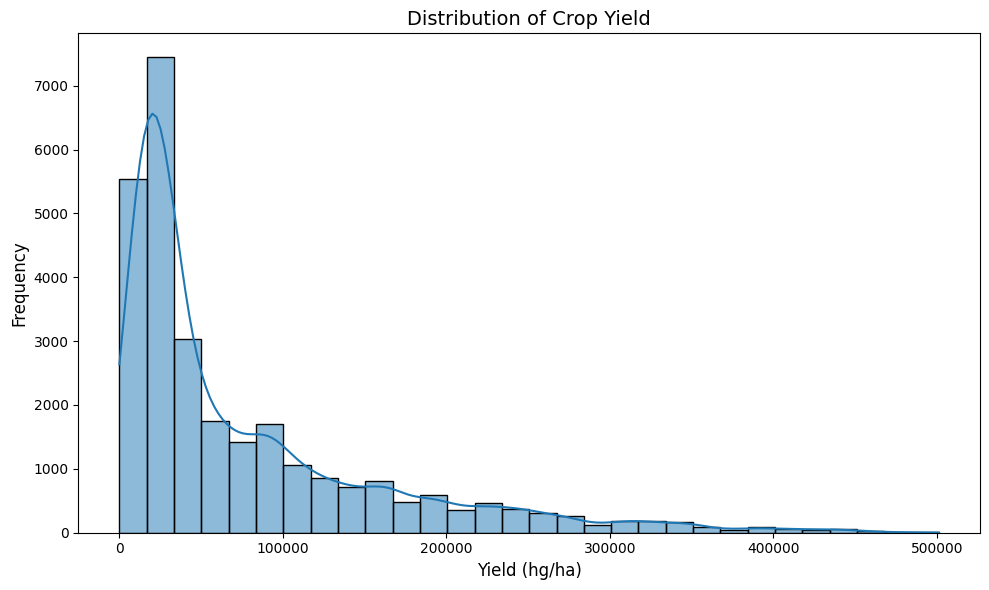

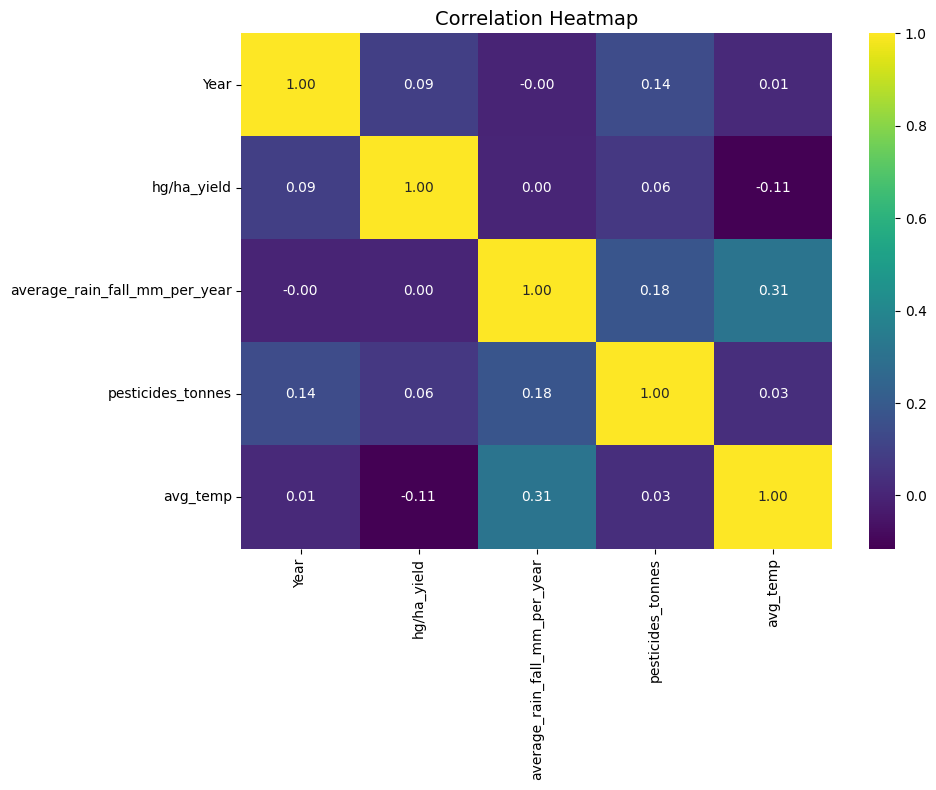

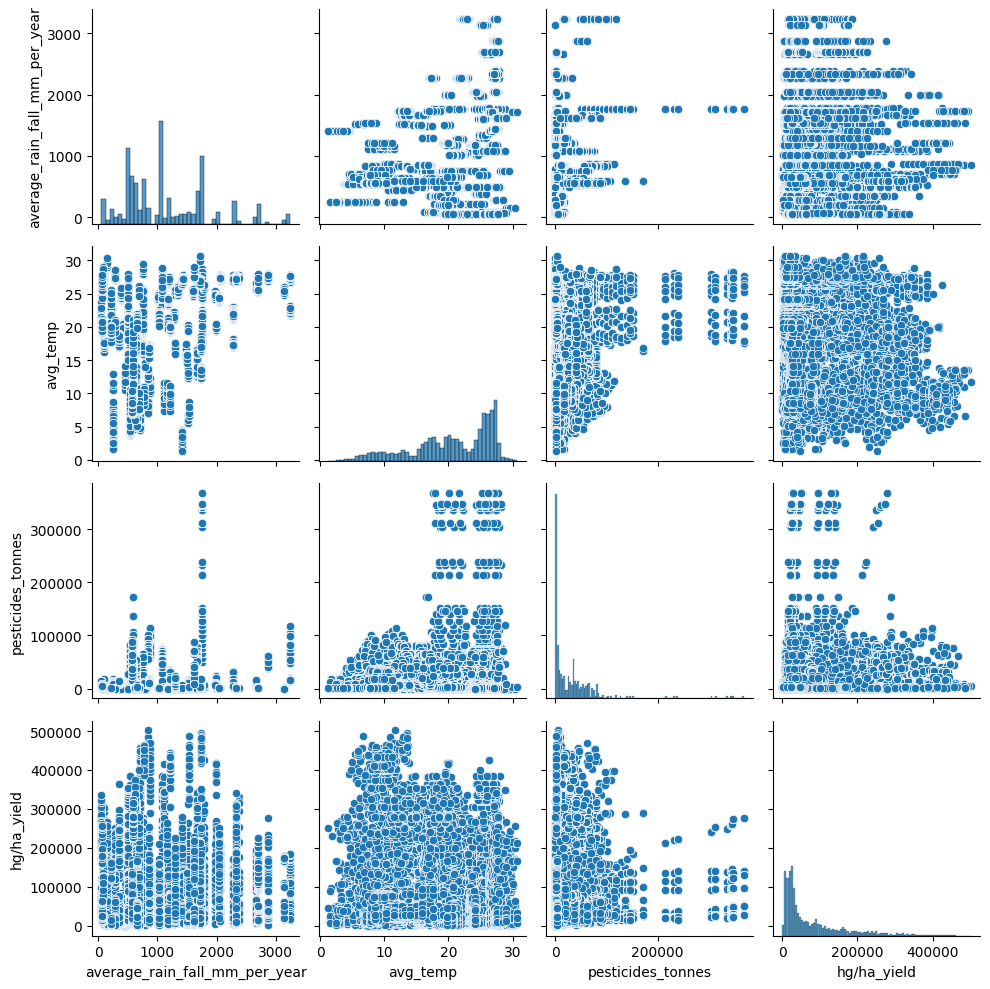

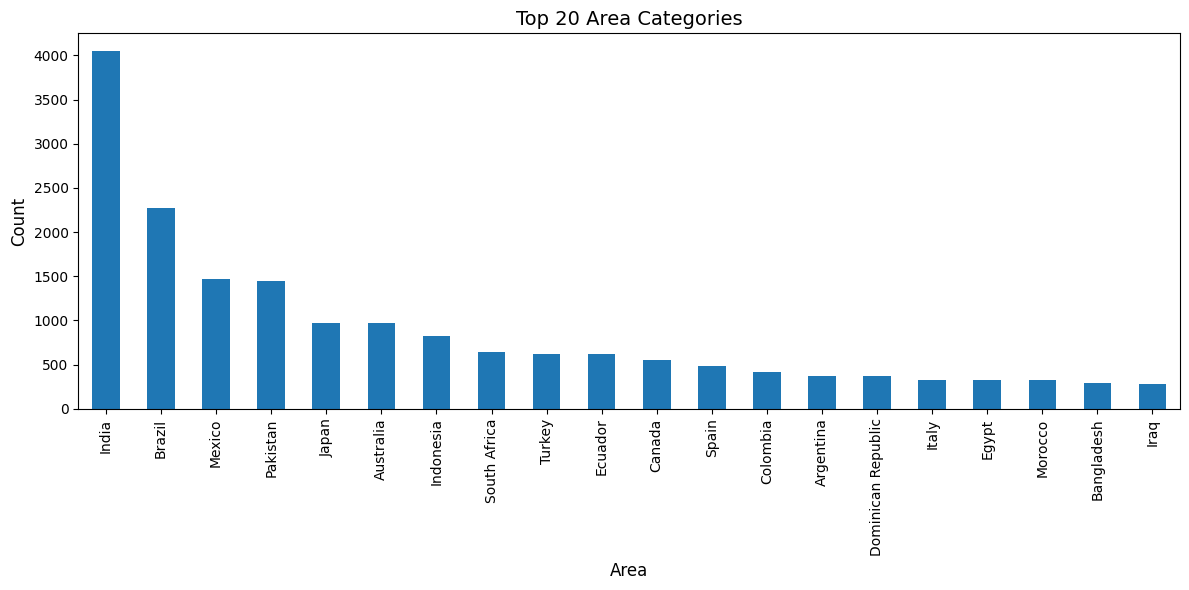

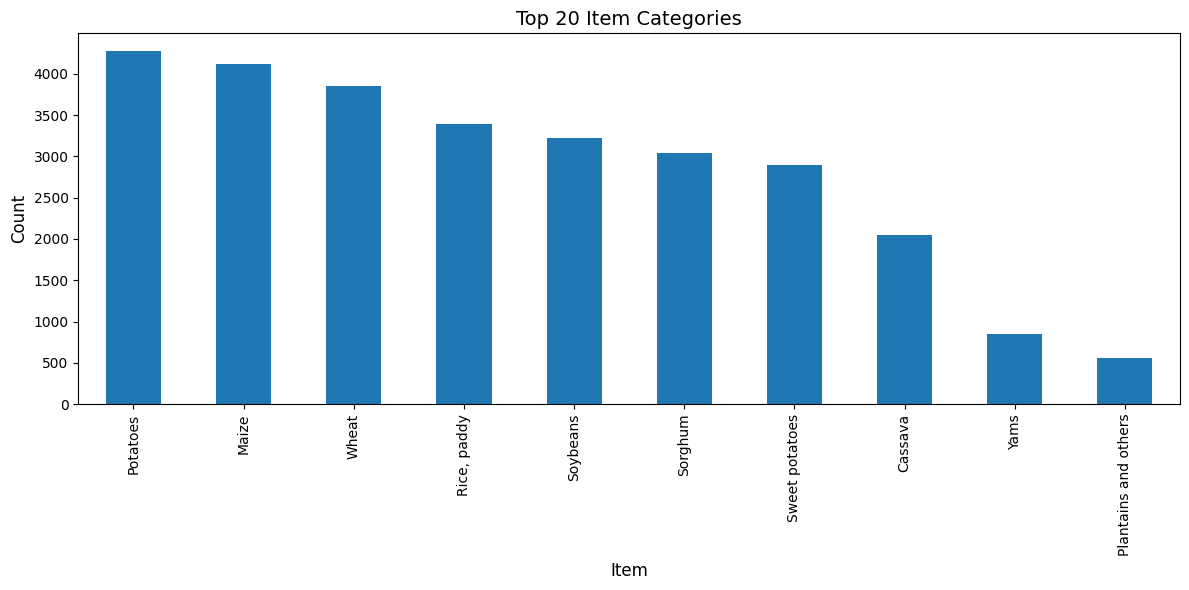

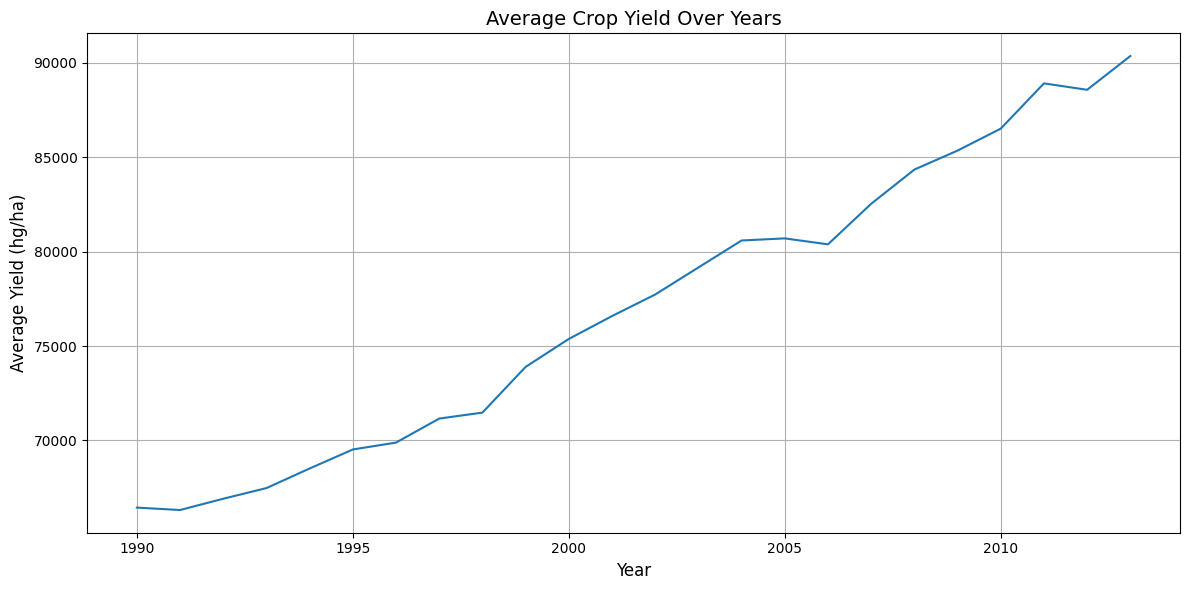

In [ ]:
# Section 3: Exploratory Data Analysis (EDA)

def perform_eda(df):
    """
    Conduct exploratory data analysis.

    Parameters:
    - df (pd.DataFrame): The dataset to analyze.

    Returns:
    - None

    Assumptions:
    - The dataset contains the required columns for analysis.
    - The environment supports plotting.

    Error Handling:
    - Checks if the dataset is not None before proceeding.
    """
    if df is not None and not df.empty:
        # Descriptive Statistics
        print("Descriptive Statistics:")
        display(df.describe())

        # Target Variable Distribution
        plt.figure(figsize=(10, 6))
        sns.histplot(df['hg/ha_yield'], kde=True, bins=30)
        plt.title('Distribution of Crop Yield', fontsize=14)
        plt.xlabel('Yield (hg/ha)', fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.tight_layout()
        plt.show()

        # Correlation Heatmap
        plt.figure(figsize=(10, 8))
        correlation_matrix = df.corr(numeric_only=True)
        sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="viridis")
        plt.title('Correlation Heatmap', fontsize=14)
        plt.tight_layout()
        plt.show()

        # Pairplot
        sns.pairplot(df[['average_rain_fall_mm_per_year', 'avg_temp', 'pesticides_tonnes', 'hg/ha_yield']])
        plt.tight_layout()
        plt.show()

        # Categorical Variable Analysis
        categorical_cols = ['Area', 'Item']
        for col in categorical_cols:
            plt.figure(figsize=(12, 6))
            df[col].value_counts().head(20).plot(kind='bar')
            plt.title(f'Top 20 {col} Categories', fontsize=14)
            plt.xlabel(col, fontsize=12)
            plt.ylabel('Count', fontsize=12)
            plt.tight_layout()
            plt.show()

        # Time Series Analysis
        plt.figure(figsize=(12, 6))
        df.groupby('Year')['hg/ha_yield'].mean().plot()
        plt.title('Average Crop Yield Over Years', fontsize=14)
        plt.xlabel('Year', fontsize=12)
        plt.ylabel('Average Yield (hg/ha)', fontsize=12)
        plt.grid()
        plt.tight_layout()
        plt.show()
    else:
        print("EDA cannot be performed as the dataset is None or empty.")

# Perform EDA on the cleaned dataset
perform_eda(yield_data_cleaned)



## Section 4: Feature Engineering
---
### Instructions
Document your feature engineering process:

**1. Feature Creation:**
   * Create new features based on domain knowledge
   * Document the rationale for each new feature
   * Validate feature usefulness

**2. Feature Selection:**
   * Identify most important features
   * Remove redundant features
   * Document selection criteria

In [ ]:
# Section 4: Feature Engineering

def engineer_features(df):
    """
    Create and select features without using the target variable.

    Parameters:
    - df (pd.DataFrame): The dataset on which to engineer features.

    Returns:
    - df_engineered (pd.DataFrame): The dataset with new features.

    Rationale:
    - Interaction Features:
        - 'rainfall_times_pesticides': Captures the combined effect of rainfall and pesticide usage, which might be synergistic in influencing yield.
        - 'temp_times_pesticides': Represents the interaction between temperature and pesticide usage, which can reveal effects like optimal temperature for pesticide efficiency.
        - 'rainfall_times_temp': Models the interaction between rainfall and temperature, highlighting climatic conditions conducive to better yield.
    - Polynomial Features:
        - Higher-order terms ('^2', '^3') introduce non-linear relationships, allowing the model to better capture non-linear dependencies in the data.

    Assumptions:
    - The dataset contains necessary numerical columns for feature engineering.

    Error Handling:
    - Checks if the dataset is not None before proceeding.
    """
    if df is not None and not df.empty:
        df_engineered = df.copy()
        # Interaction Features
        df_engineered['rainfall_times_pesticides'] = (
            df_engineered['average_rain_fall_mm_per_year'] * df_engineered['pesticides_tonnes']
        )
        df_engineered['temp_times_pesticides'] = df_engineered['avg_temp'] * df_engineered['pesticides_tonnes']
        df_engineered['rainfall_times_temp'] = (
            df_engineered['average_rain_fall_mm_per_year'] * df_engineered['avg_temp']
        )
        # Polynomial Features
        for col in ['average_rain_fall_mm_per_year', 'avg_temp', 'pesticides_tonnes']:
            df_engineered[f'{col}^2'] = df_engineered[col] ** 2
            df_engineered[f'{col}^3'] = df_engineered[col] ** 3
        return df_engineered
    else:
        print("Feature engineering cannot be performed as the dataset is None or empty.")
        return None

# Apply feature engineering to the entire dataset
yield_data_fe = engineer_features(yield_data_cleaned)


## Section 5: Model Development
---
### Instructions
Develop and train your models:

**1. Required Steps:**
   * Split data into training and testing sets
   * Implement at least 3 different models
   * Document model selection rationale
   * Implement cross-validation

**2. Memory Optimization Requirements:**
   * Use appropriate data types
   * Implement batch processing if needed
   * Document memory usage

In [ ]:
# Section 5: Data Splitting and Preprocessing

# 5.1 Encoding Categorical Variables
def label_encode_features(df, categorical_cols):
    """
    Label encode categorical features.

    Parameters:
    - df (pd.DataFrame): The dataset containing categorical features.
    - categorical_cols (list): List of categorical column names to encode.

    Returns:
    - df_encoded (pd.DataFrame): The dataset with encoded categorical features.
    - label_encoders (dict): Dictionary of LabelEncoders for each categorical feature.

    Assumptions:
    - The categorical columns exist in the dataset.

    Error Handling:
    - Checks if the dataset is not None before proceeding.
    """
    if df is not None and not df.empty:
        df_encoded = df.copy()
        label_encoders = {}
        for col in categorical_cols:
            if col in df_encoded.columns:
                le = LabelEncoder()
                df_encoded[col] = le.fit_transform(df_encoded[col])
                label_encoders[col] = le
            else:
                print(f"Column '{col}' not found in the dataset.")
        return df_encoded, label_encoders
    else:
        print("Label encoding cannot be performed as the dataset is None or empty.")
        return None, None

categorical_cols = ['Area', 'Item', 'Year']
yield_data_encoded, label_encoders = label_encode_features(yield_data_fe, categorical_cols)

# 5.2 Feature Selection
def select_features(X, y, num_features=50):
    """
    Select top features based on mutual information.

    Parameters:
    - X (pd.DataFrame): The feature matrix.
    - y (pd.Series): The target variable.
    - num_features (int): The number of top features to select.

    Returns:
    - selected_features (list): List of selected feature names.

    Assumptions:
    - X and y are not None and have appropriate dimensions.

    Error Handling:
    - Catches exceptions during mutual information calculation.
    """
    try:
        mi = mutual_info_regression(X, y)
        mi = pd.Series(mi, index=X.columns)
        mi.sort_values(ascending=False, inplace=True)
        print("\nTop Features based on Mutual Information:")
        print(mi.head(num_features))
        selected_features = mi.index[:num_features].tolist()
        return selected_features
    except Exception as e:
        print(f"Error during feature selection: {e}")
        return []

# Separate features and target
if yield_data_encoded is not None and not yield_data_encoded.empty:
    X = yield_data_encoded.drop(columns=['hg/ha_yield'])
    y = yield_data_encoded['hg/ha_yield']

    selected_features = select_features(X, y, num_features=50)
    X_selected = X[selected_features]
else:
    print("Feature selection cannot be performed as the encoded dataset is None or empty.")
    X_selected, y = None, None

# 5.3 Data Splitting
# Split data into training and testing sets
if X_selected is not None and y is not None:
    X_train, X_test, y_train, y_test = train_test_split(
        X_selected, y, test_size=0.2, random_state=42, stratify=yield_data_encoded['Area']
    )
else:
    print("Data splitting cannot be performed due to previous errors.")
    X_train, X_test, y_train, y_test = None, None, None, None

# 5.4 Scaling Numerical Features
# Identify numerical columns (excluding categorical ones)
if X_train is not None and not X_train.empty:
    numerical_cols = [col for col in X_train.columns if col not in categorical_cols]

    # Initialize scaler
    scaler = StandardScaler()

    # Fit and transform training data
    X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

    # Transform test data
    X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

    # Convert numerical columns to float32 to reduce memory usage
    X_train[numerical_cols] = X_train[numerical_cols].astype('float32')
    X_test[numerical_cols] = X_test[numerical_cols].astype('float32')

    # Print memory usage after optimization
    print(f"Memory usage after optimization:")
    print(f"X_train: {X_train.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    print(f"X_test: {X_test.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

    # Ensure there are no NaNs or infinite values
    if np.isnan(X_train[numerical_cols]).any().any() or np.isinf(X_train[numerical_cols]).any().any():
        raise ValueError("NaN or infinite values found in X_train after scaling.")
    if np.isnan(X_test[numerical_cols]).any().any() or np.isinf(X_test[numerical_cols]).any().any():
        raise ValueError("NaN or infinite values found in X_test after scaling.")
else:
    print("Scaling cannot be performed due to previous errors.")

# 5.5: Model Training
def train_models(X_train, y_train):
    """
    Train and compare different models, including cross-validation results.

    Parameters:
    - X_train (pd.DataFrame): Training feature matrix.
    - y_train (pd.Series): Training target variable.

    Returns:
    - best_models (dict): Dictionary of trained models.
    - cv_results (dict): Dictionary containing cross-validation results.
    - training_times (dict): Dictionary containing training times for each model.

    Assumptions:
    - X_train and y_train are not None and have appropriate dimensions.
    - No NaN or infinite values in X_train and y_train.

    Error Handling:
    - Catches exceptions during model training.

    Model Selection Rationale:
    - Linear Regression, Ridge, and Lasso Regression:
        - Serve as baseline models to understand linear relationships.
    - Random Forest:
        - Captures non-linear relationships.
        - Provides feature importance.
    - Gradient Boosting:
        - Builds models sequentially to correct errors.
    - XGBoost:
        - Optimized implementation of gradient boosting.
        - Handles missing data well.
    - CatBoost:
        - Handles categorical features natively.
        - Efficient and often requires less parameter tuning.
    """
    if X_train is None or y_train is None or X_train.empty or y_train.empty:
        print("Model training cannot be performed due to previous errors.")
        return {}, {}, {}

    # Ensure there are no NaNs or infinite values in the data
    if np.isnan(X_train).any().any() or np.isinf(X_train).any().any():
        raise ValueError("NaN or infinite values found in X_train.")
    if np.isnan(y_train).any() or np.isinf(y_train).any():
        raise ValueError("NaN or infinite values found in y_train.")

    # Define models
    models = {
        'Linear Regression': LinearRegression(),
        'Ridge Regression': Ridge(),
        'Lasso Regression': Lasso(max_iter=10000),
        'Random Forest': RandomForestRegressor(random_state=42),
        'Gradient Boosting': GradientBoostingRegressor(random_state=42),
        'XGBoost': XGBRegressor(random_state=42, objective='reg:squarederror', verbosity=0),
        'CatBoost': CatBoostRegressor(random_seed=42, verbose=0),
    }

    # Dictionaries to store results
    best_models = {}  # Store the best trained models
    cv_results = {}  # Store cross-validation results
    training_times = {}  # Store training times for each model

    # Loop through each model for training and evaluation
    for name, model in models.items():
        print(f"\nTraining {name}...")
        start_time = time.time()  # Start timing

        try:
            # Hyperparameter tuning for Random Forest
            if name == 'Random Forest':
                param_grid = {
                    'n_estimators': [100, 200],  # Number of trees
                    'max_depth': [10, 20, None],  # Maximum depth of the tree
                    'min_samples_split': [2, 5],  # Minimum number of samples to split an internal node
                    'min_samples_leaf': [1, 2]  # Minimum number of samples at a leaf node
                }
                grid_search = RandomizedSearchCV(
                    model, param_distributions=param_grid, n_iter=10,
                    cv=3, scoring='r2', n_jobs=-1, random_state=42
                )
                grid_search.fit(X_train, y_train)  # Perform the grid search
                best_models[name] = grid_search.best_estimator_  # Store the best model
                cv_mean = grid_search.best_score_  # Mean cross-validation score
                cv_std = grid_search.cv_results_['std_test_score'][grid_search.best_index_]  # Standard deviation
                cv_results[name] = {
                    "Best Parameters": grid_search.best_params_,  # Best hyperparameters
                    "CV R² Mean": cv_mean,  # Mean R² score
                    "CV R² Std": cv_std  # Standard deviation of R² scores
                }
                # Print cross-validation results
                print(f"Best Cross-Validation R² for {name}: {cv_mean:.4f} ± {cv_std:.4f}")
                print(f"Best Parameters for {name}: {grid_search.best_params_}")
            else:
                # For other models
                # Perform cross-validation
                cv_scores = cross_val_score(
                    model, X_train, y_train, cv=3, scoring='r2', n_jobs=-1
                )
                cv_mean = cv_scores.mean()  # Mean cross-validation score
                cv_std = cv_scores.std()  # Standard deviation of cross-validation scores

                # Fit the model on the full training data
                model.fit(X_train, y_train)
                best_models[name] = model  # Store the trained model
                cv_results[name] = {
                    "CV R² Mean": cv_mean,  # Mean R² score
                    "CV R² Std": cv_std  # Standard deviation of R² scores
                }
                # Print cross-validation results
                print(f"Cross-Validation R² for {name}: {cv_mean:.4f} ± {cv_std:.4f}")

            end_time = time.time()  # End timing
            training_times[name] = end_time - start_time  # Record training time

        except Exception as e:
            # Handle errors during model training
            print(f"Error training {name}: {e}")

    return best_models, cv_results, training_times

# Train models
best_models, cv_results, training_times = train_models(X_train, y_train)




Top Features based on Mutual Information:
pesticides_tonnes                  2.886737
pesticides_tonnes^2                2.885818
rainfall_times_pesticides          2.881565
pesticides_tonnes^3                2.868014
Area                               1.894444
average_rain_fall_mm_per_year      1.864460
average_rain_fall_mm_per_year^2    1.835890
average_rain_fall_mm_per_year^3    1.790092
Year                               1.479329
Item                               1.304635
temp_times_pesticides              0.588972
rainfall_times_temp                0.460953
avg_temp                           0.239064
avg_temp^2                         0.232069
avg_temp^3                         0.231572
dtype: float64
Memory usage after optimization:
X_train: 1.72 MB
X_test: 0.43 MB

Training Linear Regression...
Cross-Validation R² for Linear Regression: 0.1114 ± 0.0008

Training Ridge Regression...
Cross-Validation R² for Ridge Regression: 0.1112 ± 0.0008

Training Lasso Regression...
Cross-Va

## Section 6: Model Evaluation
---
### Instructions
Evaluate your models thoroughly:

**1. Required Metrics:**
   * Accuracy/RMSE (depending on problem type)
   * Precision, Recall, F1-Score (for classification)
   * Cross-validation scores
   * Model comparison analysis

**2. Required Visualizations:**
   * Confusion matrix (for classification)
   * ROC curves (for classification)
   * Prediction vs Actual plots (for regression)
   * Feature importance plots


Evaluating Linear Regression...
R² Score (Train): 0.1125
R² Score (Test): 0.1112
Cross-Validation R²: 0.1114 ± 0.0008
Generalization Percentage: 98.86%
MSE (Train): 6458376363.1303 | MSE (Test): 6200518991.8986
MAE (Train): 62293.7742 | MAE (Test): 61063.7880
MAPE (Train): 2.3367 | MAPE (Test): 2.4210


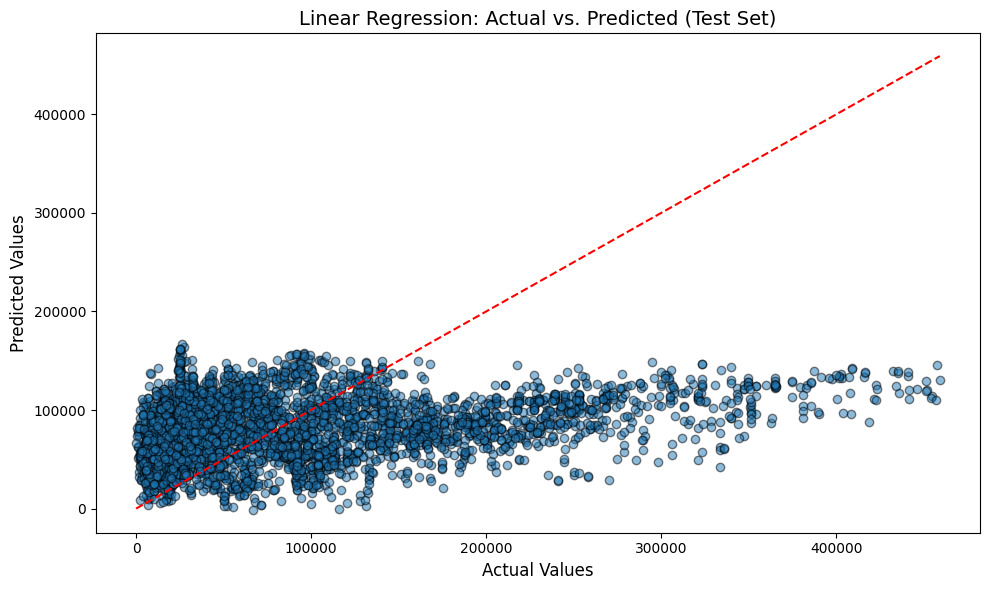

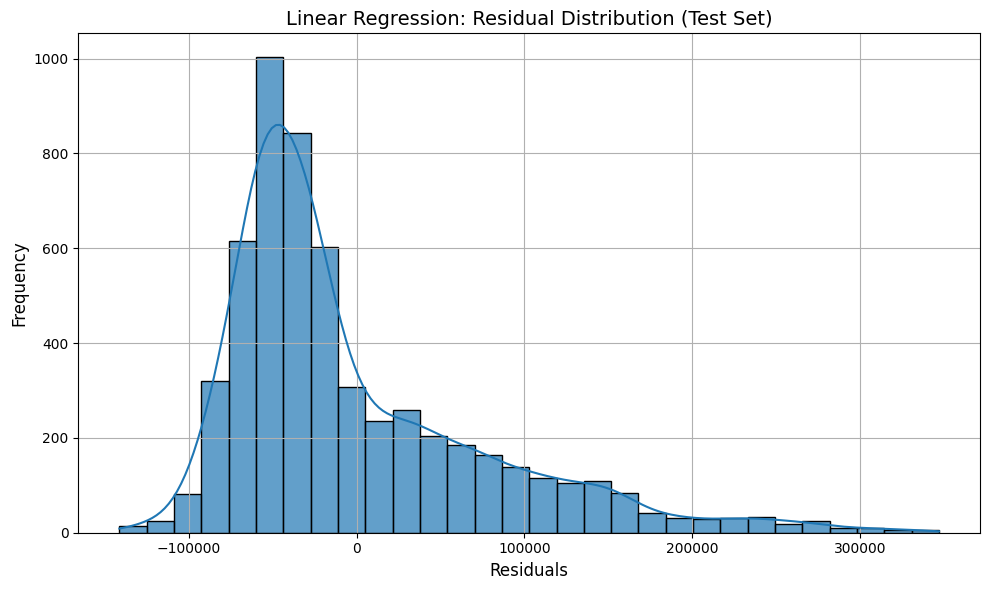


Evaluating Ridge Regression...
R² Score (Train): 0.1124
R² Score (Test): 0.1112
Cross-Validation R²: 0.1112 ± 0.0008
Generalization Percentage: 98.87%
MSE (Train): 6459190459.6113 | MSE (Test): 6201160698.4992
MAE (Train): 62293.0988 | MAE (Test): 61066.4801
MAPE (Train): 2.3383 | MAPE (Test): 2.4214


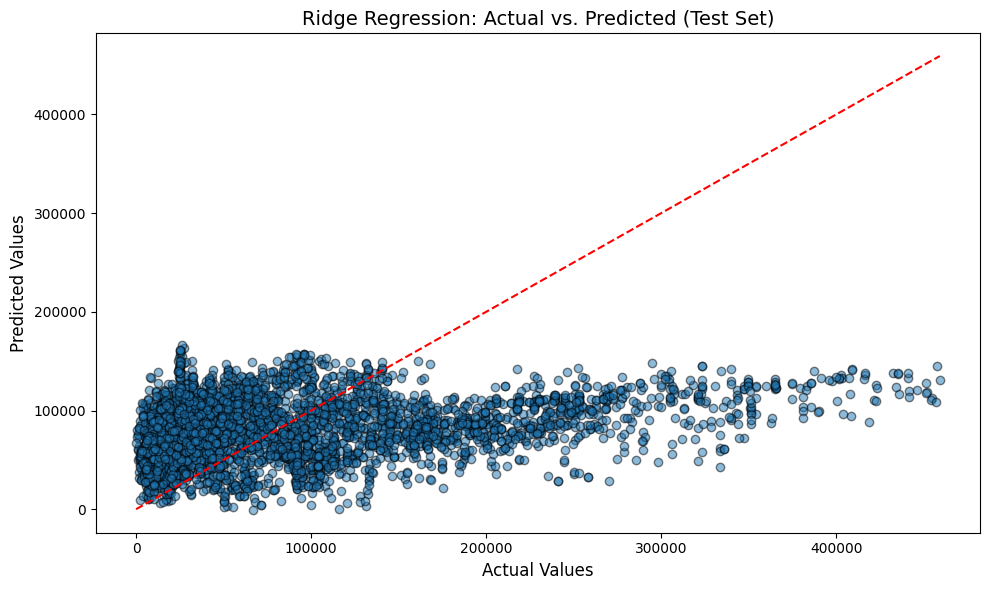

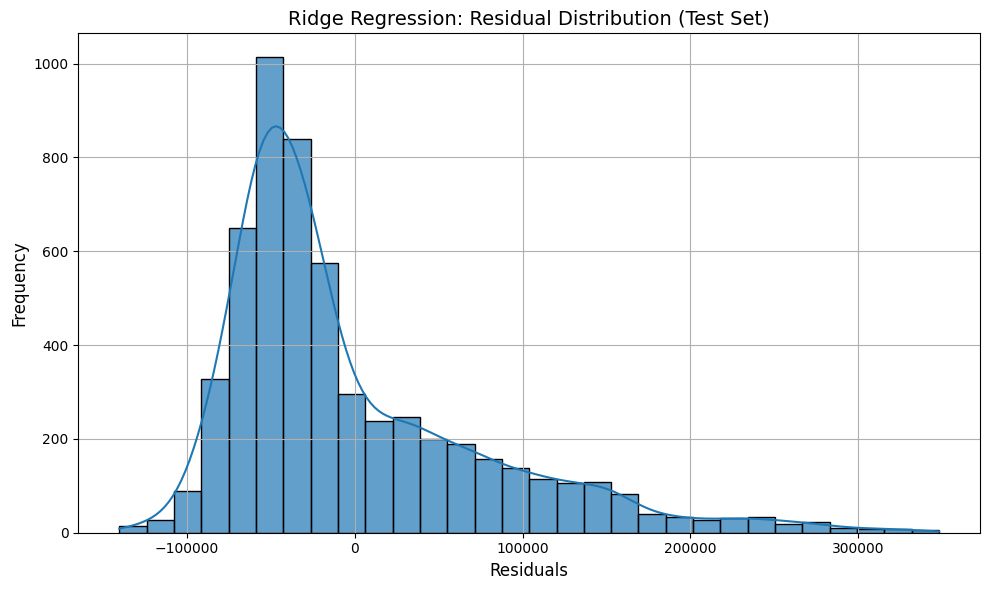


Evaluating Lasso Regression...
R² Score (Train): 0.1125
R² Score (Test): 0.1112
Cross-Validation R²: 0.1114 ± 0.0008
Generalization Percentage: 98.85%
MSE (Train): 6458395628.0570 | MSE (Test): 6200607123.1220
MAE (Train): 62293.0173 | MAE (Test): 61063.7536
MAPE (Train): 2.3371 | MAPE (Test): 2.4212


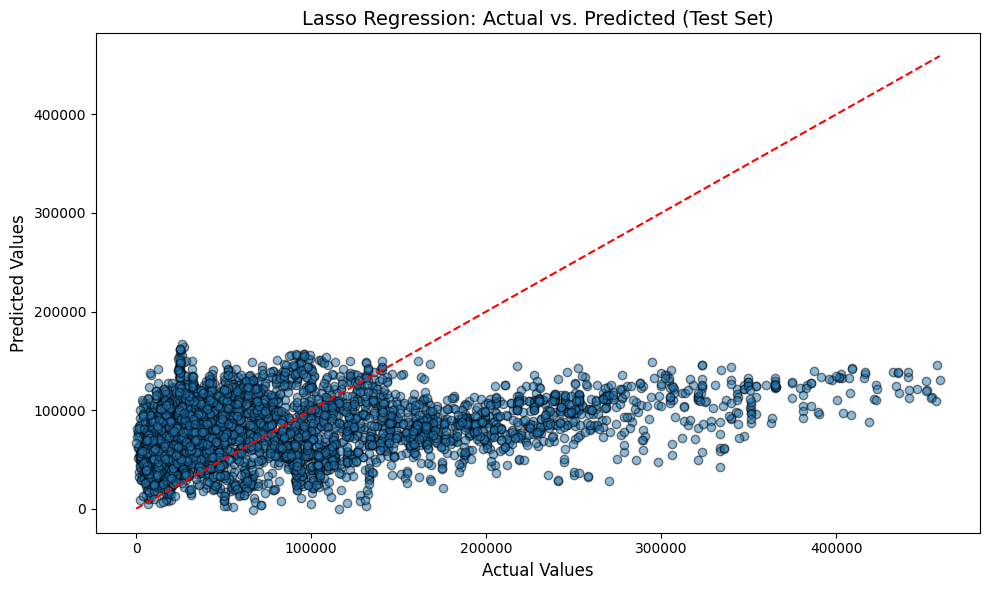

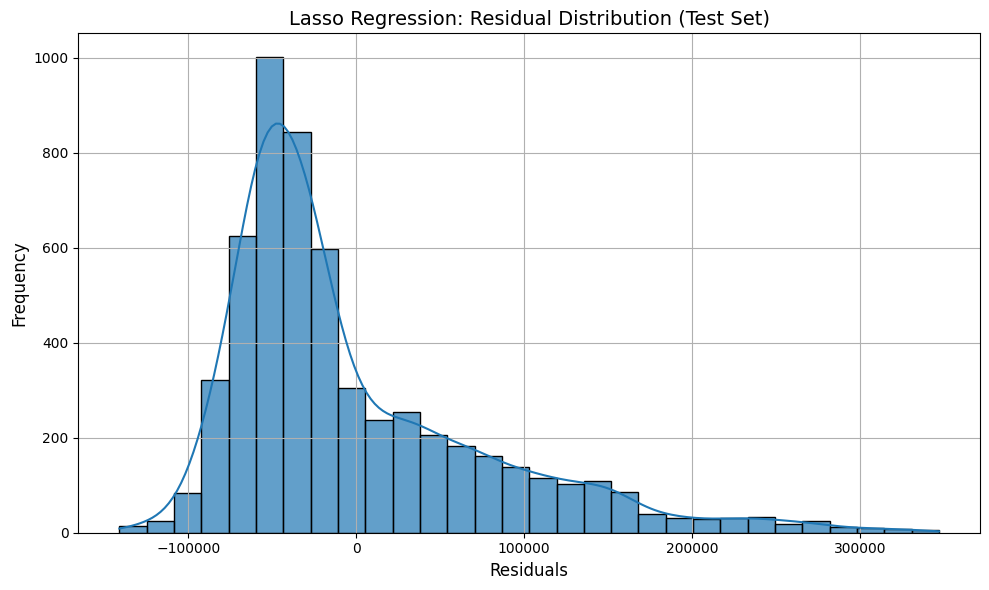


Evaluating Random Forest...
R² Score (Train): 0.9978
R² Score (Test): 0.9847
Cross-Validation R²: 0.9783 ± 0.0019
Generalization Percentage: 98.68%
MSE (Train): 15957373.5429 | MSE (Test): 106876560.6171
MAE (Train): 1547.9634 | MAE (Test): 3952.7685
MAPE (Train): 0.0408 | MAPE (Test): 0.1205


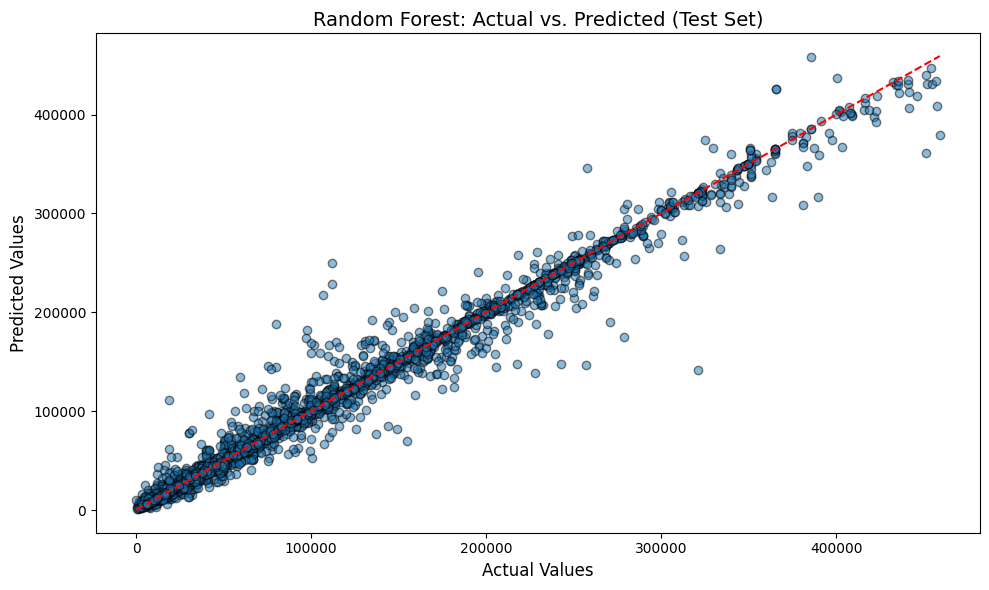

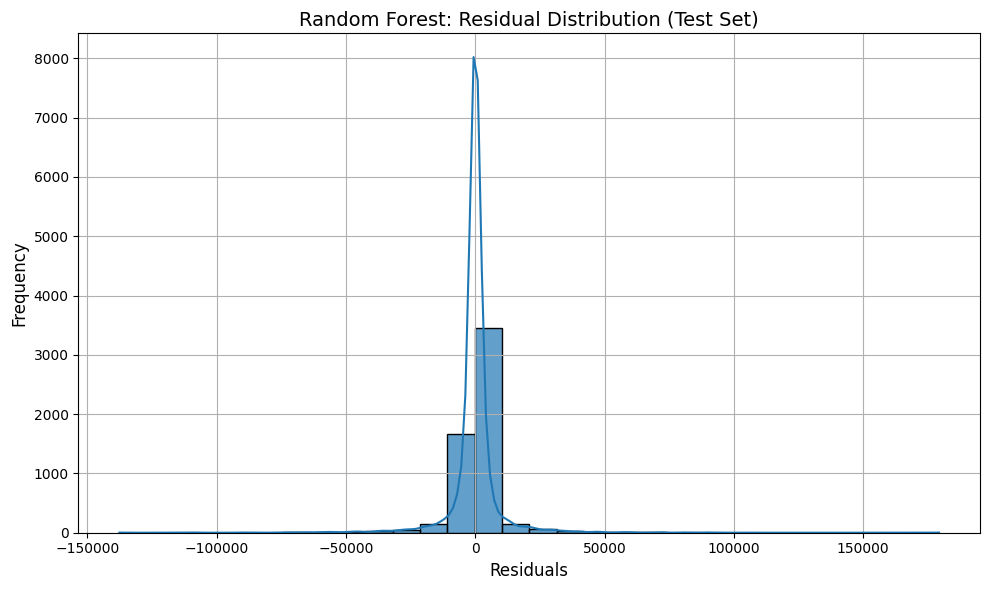


Evaluating Gradient Boosting...
R² Score (Train): 0.8340
R² Score (Test): 0.8280
Cross-Validation R²: 0.8316 ± 0.0066
Generalization Percentage: 99.29%
MSE (Train): 1208374095.5048 | MSE (Test): 1199821126.0721
MAE (Train): 21704.4448 | MAE (Test): 21776.4948
MAPE (Train): 0.5886 | MAPE (Test): 0.6267


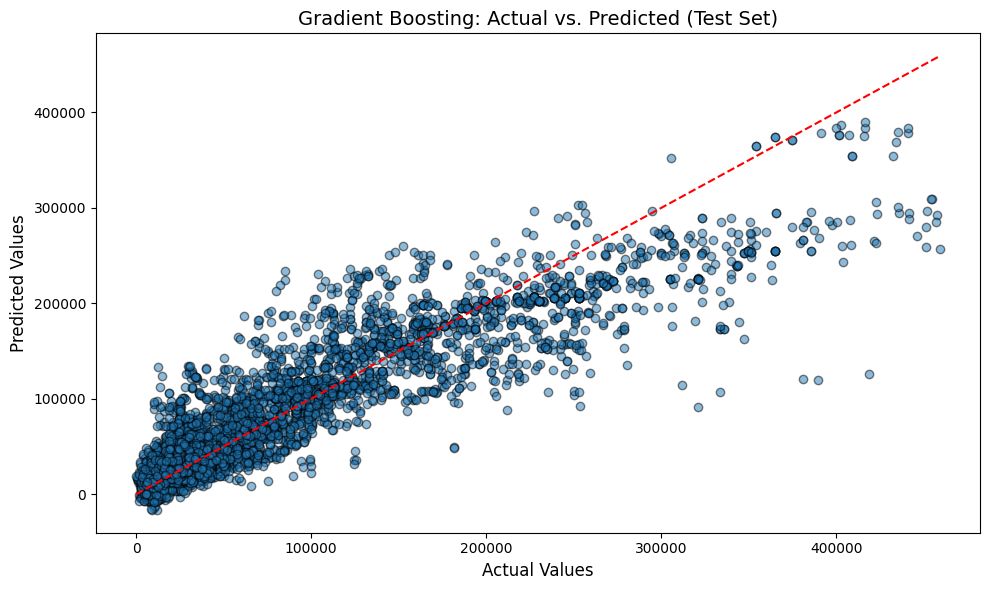

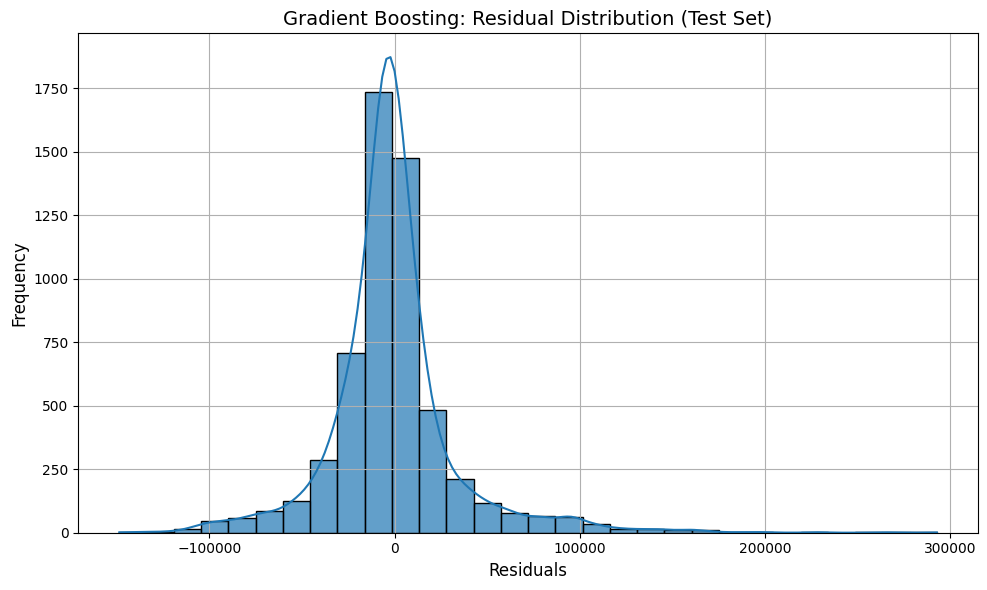


Evaluating XGBoost...
R² Score (Train): 0.9858
R² Score (Test): 0.9736
Cross-Validation R²: 0.9677 ± 0.0016
Generalization Percentage: 98.76%
MSE (Train): 103549386.0781 | MSE (Test): 184464643.2553
MAE (Train): 6118.2155 | MAE (Test): 7687.9824
MAPE (Train): 0.1731 | MAPE (Test): 0.2281


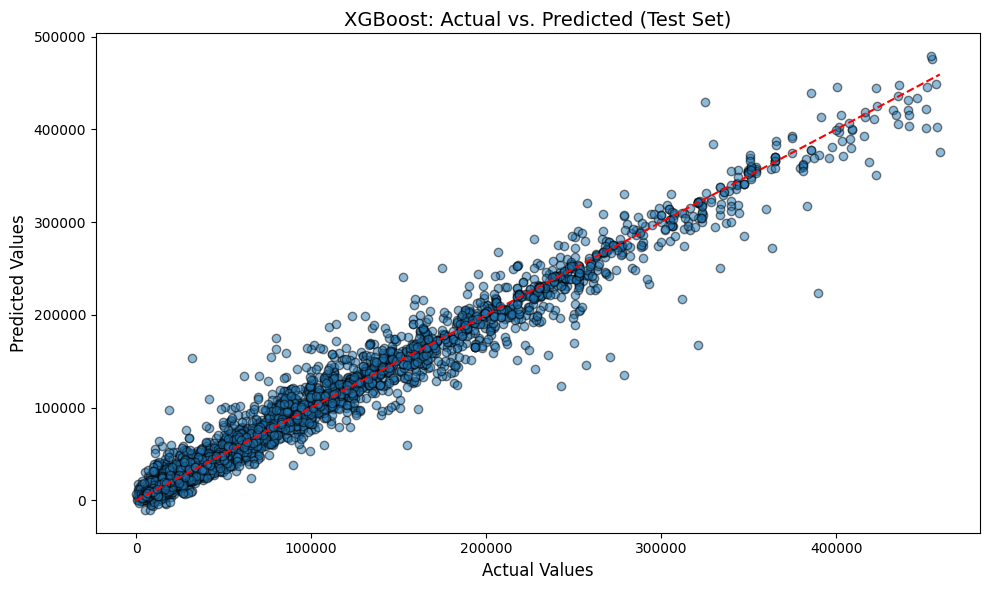

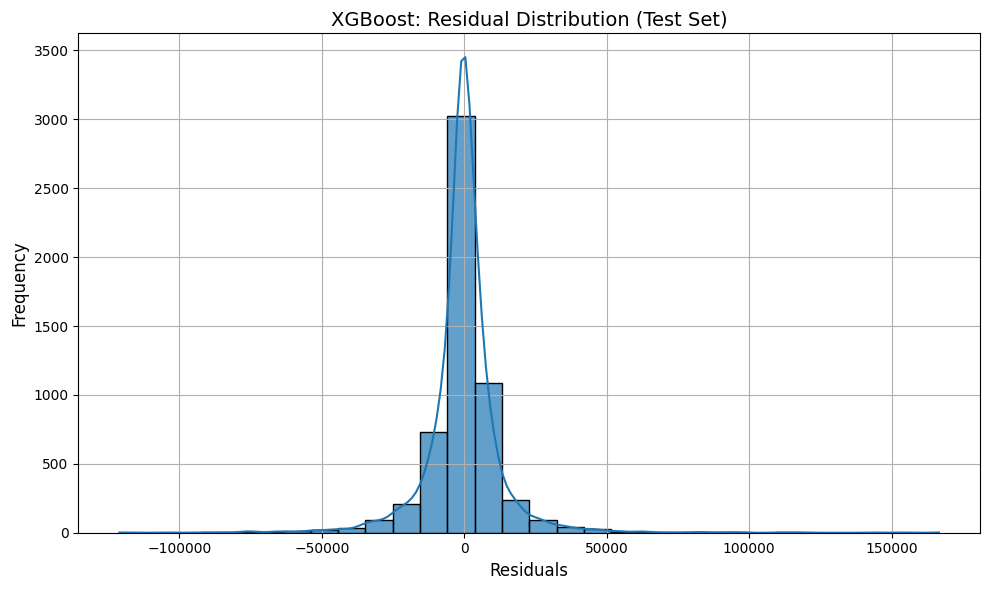


Evaluating CatBoost...
R² Score (Train): 0.9772
R² Score (Test): 0.9696
Cross-Validation R²: 0.9639 ± 0.0017
Generalization Percentage: 99.23%
MSE (Train): 166262808.2283 | MSE (Test): 211821070.8013
MAE (Train): 7943.4130 | MAE (Test): 8741.5340
MAPE (Train): 0.2378 | MAPE (Test): 0.2803


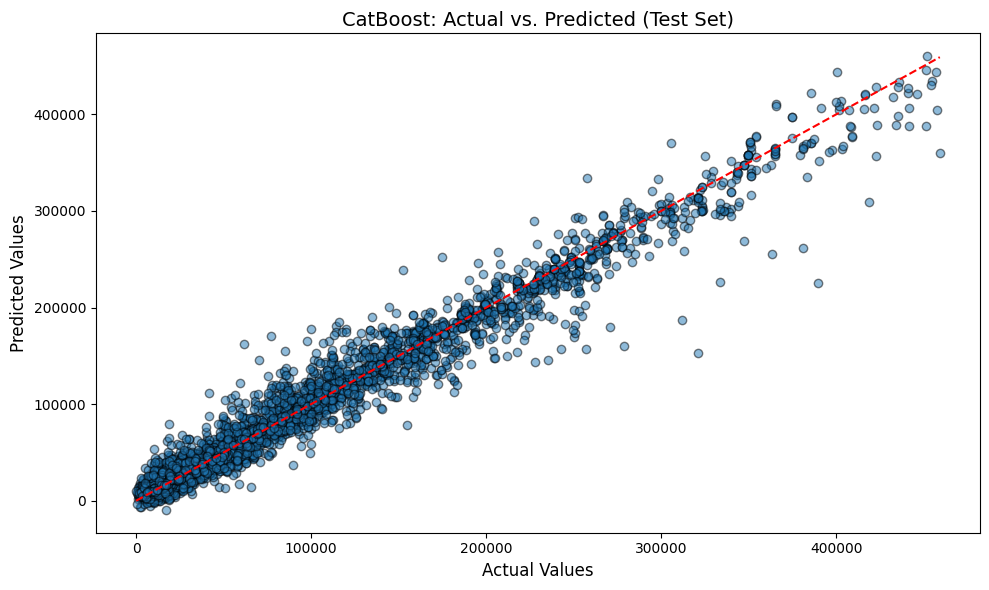

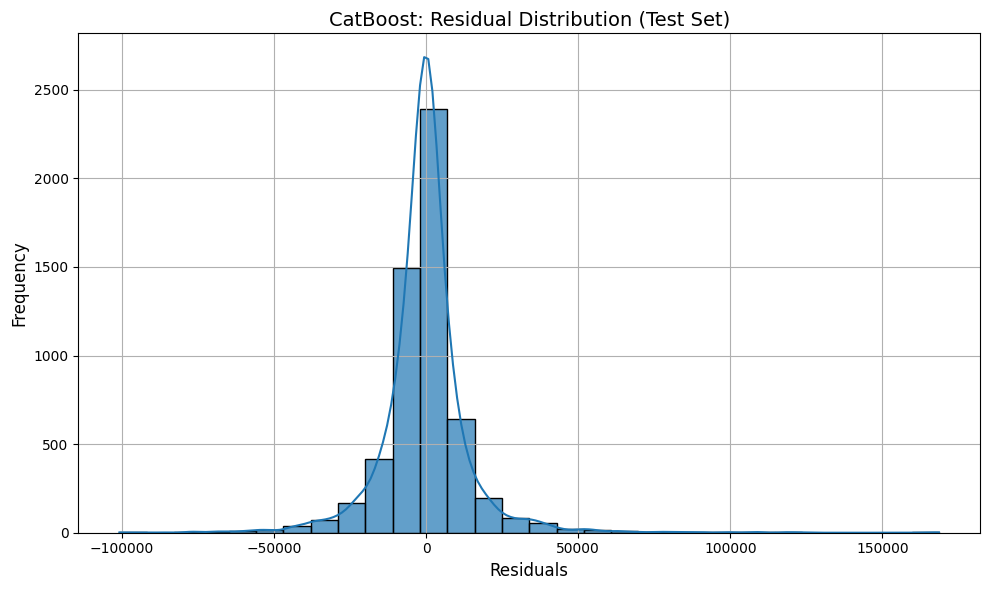

Linear Regression        R² (Train): 0.1125 | R² (Test): 0.1112 | CV R²: 0.1114 ± 0.0008
Ridge Regression         R² (Train): 0.1124 | R² (Test): 0.1112 | CV R²: 0.1112 ± 0.0008
Lasso Regression         R² (Train): 0.1125 | R² (Test): 0.1112 | CV R²: 0.1114 ± 0.0008
Random Forest            R² (Train): 0.9978 | R² (Test): 0.9847 | CV R²: 0.9783 ± 0.0019
Gradient Boosting        R² (Train): 0.8340 | R² (Test): 0.8280 | CV R²: 0.8316 ± 0.0066
XGBoost                  R² (Train): 0.9858 | R² (Test): 0.9736 | CV R²: 0.9677 ± 0.0016
CatBoost                 R² (Train): 0.9772 | R² (Test): 0.9696 | CV R²: 0.9639 ± 0.0017


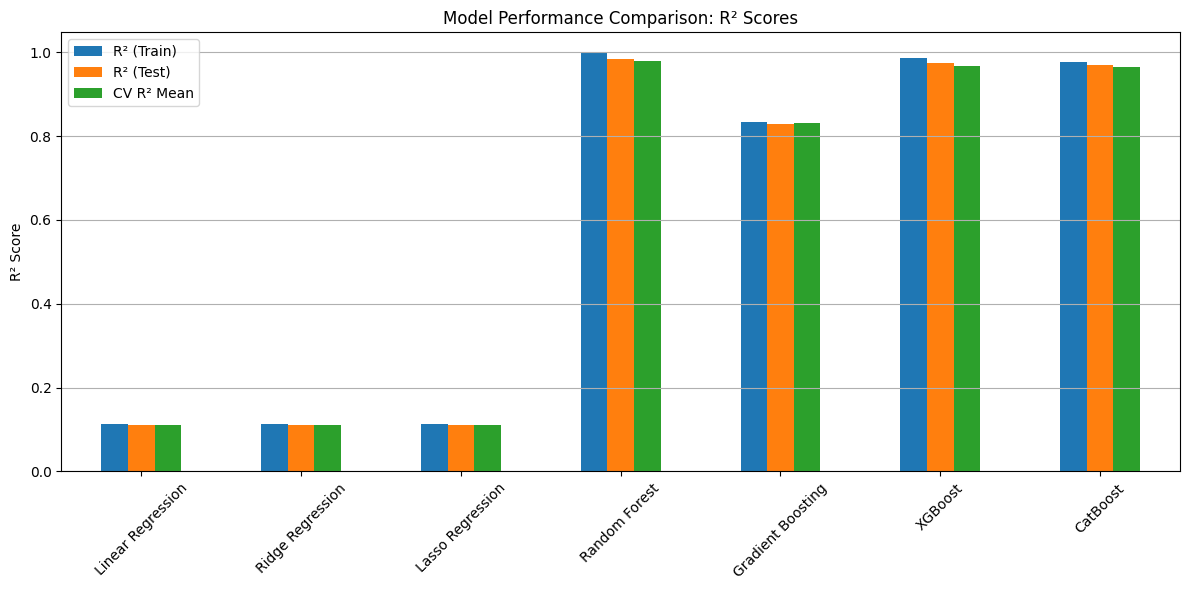

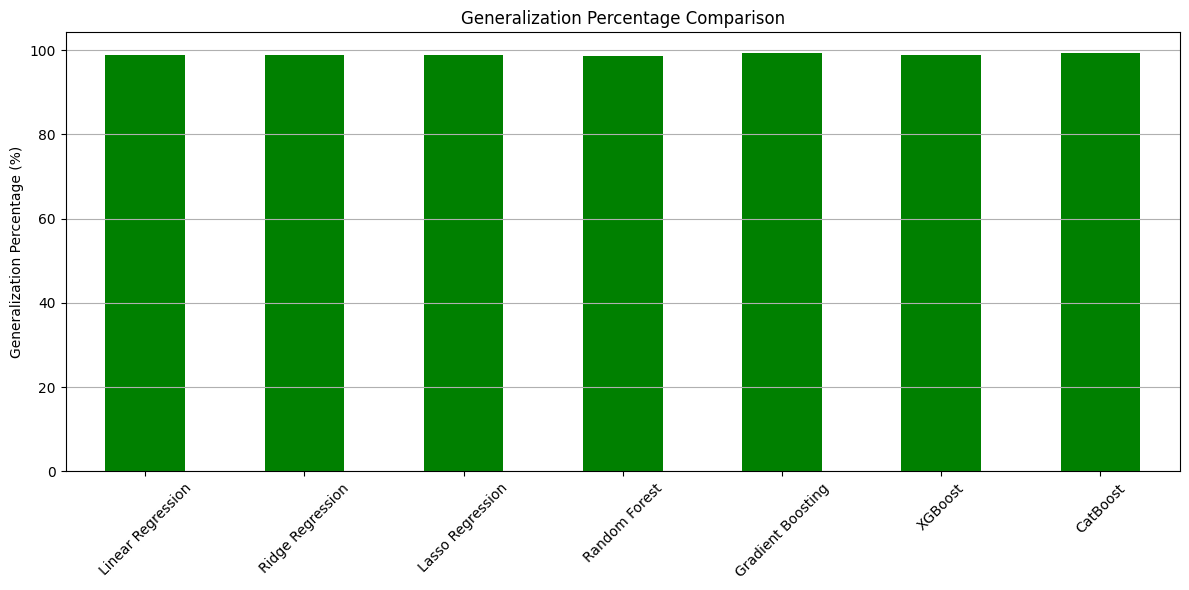

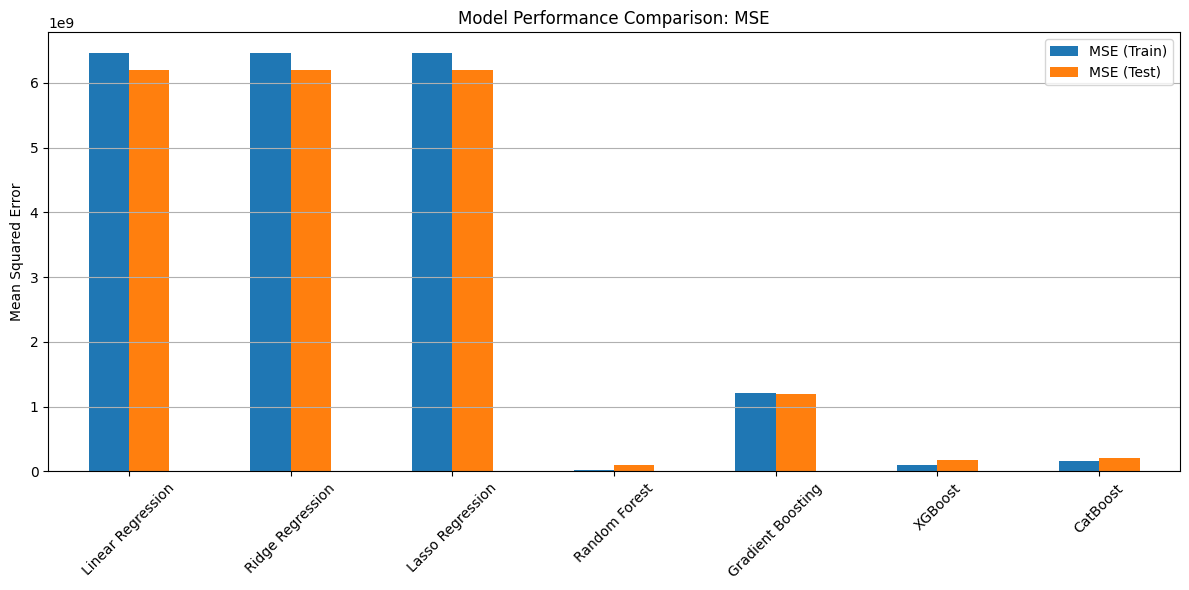

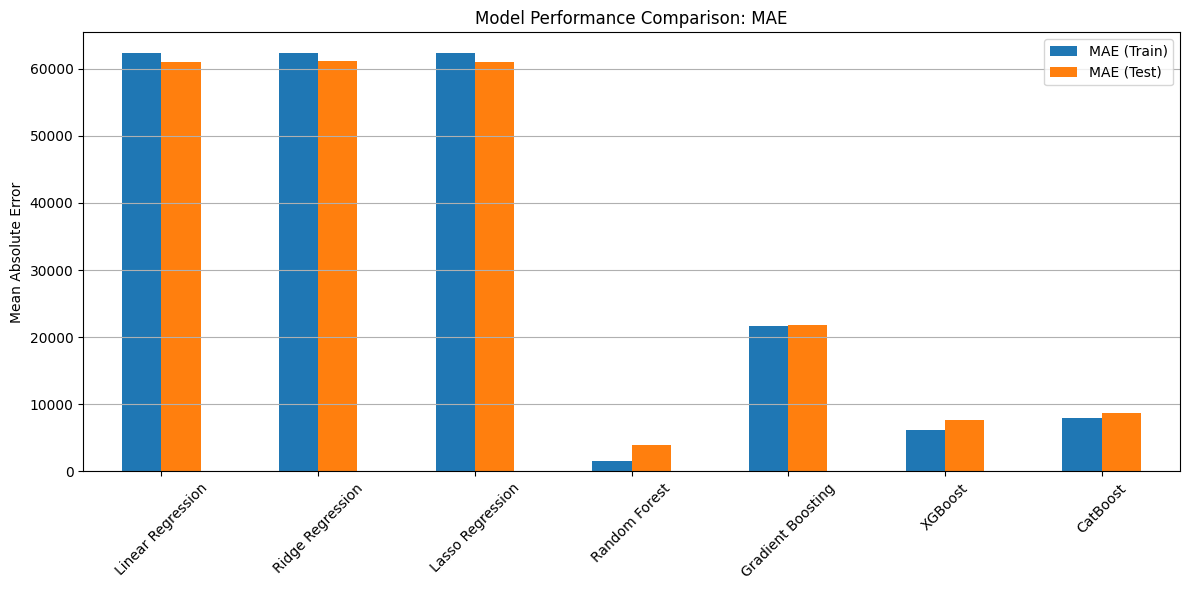

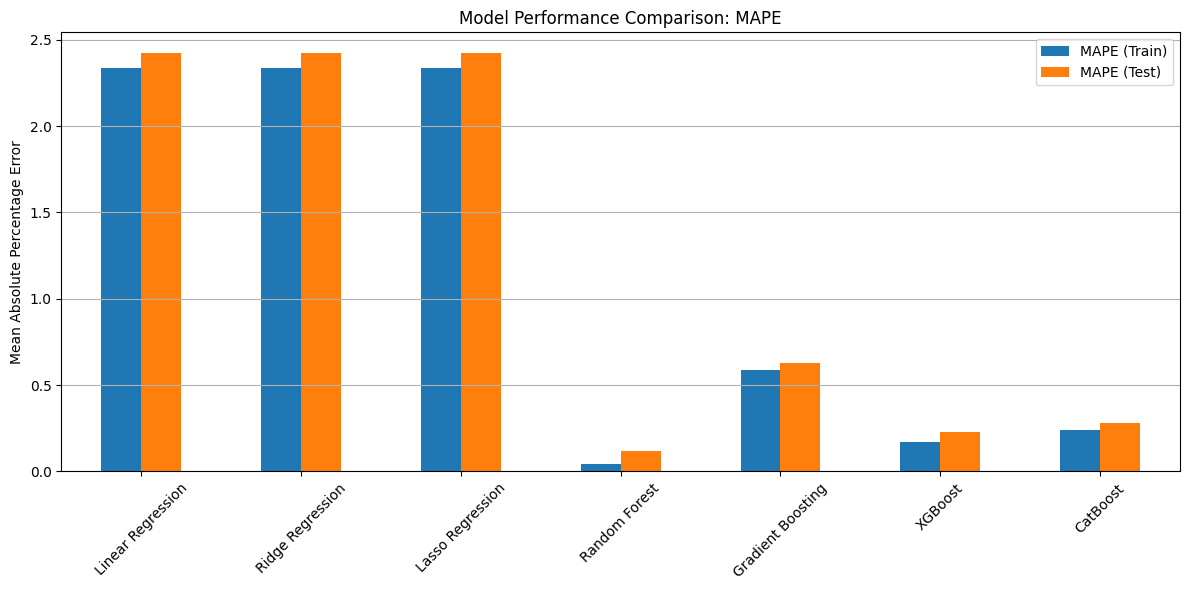

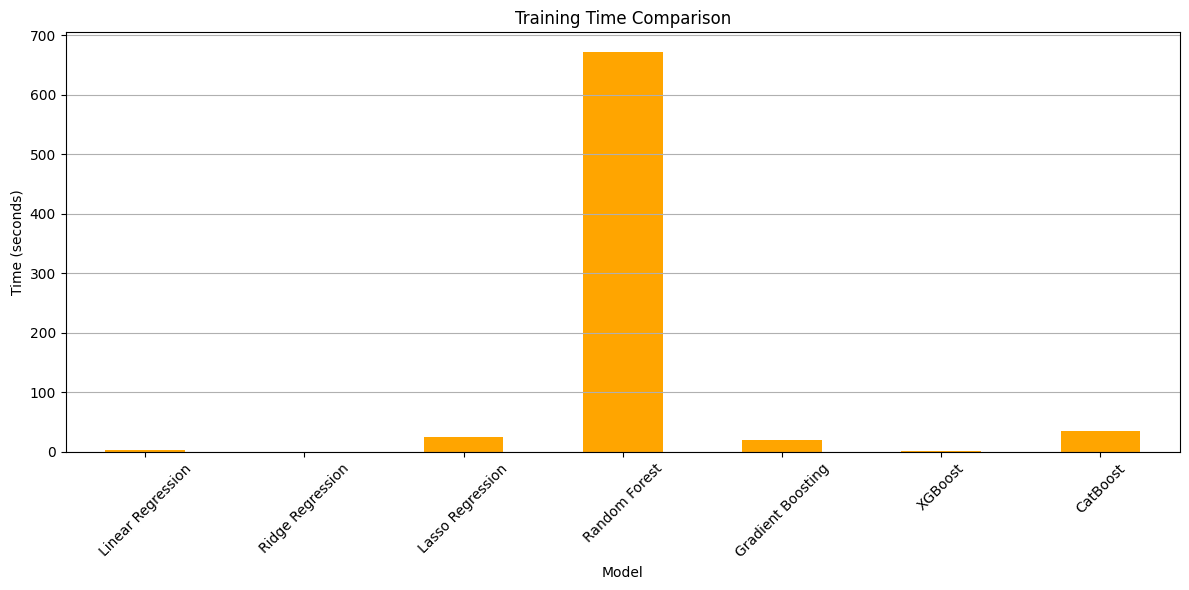

In [ ]:
# Section 6: Model Evaluation

def evaluate_models(models, X_train, y_train, X_test, y_test, cv_results):
    """
    Evaluate each model and visualize performance.

    Parameters:
    - models (dict): Dictionary of trained models.
    - X_train (pd.DataFrame): Training feature matrix.
    - y_train (pd.Series): Training target variable.
    - X_test (pd.DataFrame): Testing feature matrix.
    - y_test (pd.Series): Testing target variable.
    - cv_results (dict): Cross-validation results for each model.

    Returns:
    - metrics (dict): Dictionary containing evaluation metrics for each model.

    Assumptions:
    - The models have been trained.
    - The datasets are appropriate for evaluation.

    Error Handling:
    - Catches exceptions during model evaluation.
    """
    if not models:
        print("No models to evaluate.")
        return {}

    metrics = {}
    for name, model in models.items():
        print(f"\nEvaluating {name}...")
        try:
            y_pred_train = model.predict(X_train)
            y_pred_test = model.predict(X_test)

            # Metrics for Training Data
            r2_train = r2_score(y_train, y_pred_train)
            mse_train = mean_squared_error(y_train, y_pred_train)
            mae_train = mean_absolute_error(y_train, y_pred_train)
            mape_train = mean_absolute_percentage_error(y_train, y_pred_train)

            # Metrics for Test Data
            r2_test = r2_score(y_test, y_pred_test)
            mse_test = mean_squared_error(y_test, y_pred_test)
            mae_test = mean_absolute_error(y_test, y_pred_test)
            mape_test = mean_absolute_percentage_error(y_test, y_pred_test)

            generalization_percentage = (r2_test / r2_train) * 100 if r2_train != 0 else 0

            # Cross-Validation Metrics
            cv_r2_mean = cv_results[name].get('CV R² Mean', None)
            cv_r2_std = cv_results[name].get('CV R² Std', None)

            print(f"R² Score (Train): {r2_train:.4f}")
            print(f"R² Score (Test): {r2_test:.4f}")
            if cv_r2_mean is not None:
                print(f"Cross-Validation R²: {cv_r2_mean:.4f} ± {cv_r2_std:.4f}")
            print(f"Generalization Percentage: {generalization_percentage:.2f}%")
            print(f"MSE (Train): {mse_train:.4f} | MSE (Test): {mse_test:.4f}")
            print(f"MAE (Train): {mae_train:.4f} | MAE (Test): {mae_test:.4f}")
            print(f"MAPE (Train): {mape_train:.4f} | MAPE (Test): {mape_test:.4f}")

            # Store metrics
            metrics[name] = {
                'R² (Train)': r2_train,
                'R² (Test)': r2_test,
                'CV R² Mean': cv_r2_mean,
                'CV R² Std': cv_r2_std,
                'MSE (Train)': mse_train,
                'MSE (Test)': mse_test,
                'MAE (Train)': mae_train,
                'MAE (Test)': mae_test,
                'MAPE (Train)': mape_train,
                'MAPE (Test)': mape_test,
                'Generalization %': generalization_percentage
            }

            # Prediction vs Actual Plot
            plt.figure(figsize=(10, 6))
            plt.scatter(y_test, y_pred_test, alpha=0.5, edgecolor='k')
            plt.title(f'{name}: Actual vs. Predicted (Test Set)', fontsize=14)
            plt.xlabel('Actual Values', fontsize=12)
            plt.ylabel('Predicted Values', fontsize=12)
            plt.plot(
                [y_test.min(), y_test.max()],
                [y_test.min(), y_test.max()],
                color='red', linestyle='--'
            )
            plt.tight_layout()
            plt.show()

            # Residuals Plot
            residuals = y_test - y_pred_test
            plt.figure(figsize=(10, 6))
            sns.histplot(residuals, kde=True, bins=30, alpha=0.7)
            plt.title(f'{name}: Residual Distribution (Test Set)', fontsize=14)
            plt.xlabel('Residuals', fontsize=12)
            plt.ylabel('Frequency', fontsize=12)
            plt.grid()
            plt.tight_layout()
            plt.show()
        except Exception as e:
            print(f"Error evaluating {name}: {e}")

    return metrics

# Evaluate models
model_metrics = evaluate_models(best_models, X_train, y_train, X_test, y_test, cv_results)

# Model Comparison and Feature Importance

def compare_models(metrics, training_times):
    """
    Compare all models and generate comparative visualizations.

    Parameters:
    - metrics (dict): Dictionary containing evaluation metrics for each model.
    - training_times (dict): Training times for each model.

    Returns:
    - None

    Assumptions:
    - All models have been evaluated.
    """
    if not metrics:
        print("No metrics available for comparison.")
        return

    # Convert metrics dictionary to DataFrame
    metrics_df = pd.DataFrame(metrics).T

    # Display R² scores and CV R² scores
    for name in metrics_df.index:
        cv_mean = metrics_df.loc[name, 'CV R² Mean']
        cv_std = metrics_df.loc[name, 'CV R² Std']
        if pd.isnull(cv_mean):
            cv_mean, cv_std = 0, 0
        print(f"{name:<25}R² (Train): {metrics_df.loc[name, 'R² (Train)']:.4f} | "
              f"R² (Test): {metrics_df.loc[name, 'R² (Test)']:.4f} | "
              f"CV R²: {cv_mean:.4f} ± {cv_std:.4f}")

    # Performance Comparison Plot
    metrics_df[['R² (Train)', 'R² (Test)', 'CV R² Mean']].plot(kind='bar', figsize=(12, 6), rot=45)
    plt.title('Model Performance Comparison: R² Scores')
    plt.ylabel('R² Score')
    plt.grid(axis='y')
    plt.legend(['R² (Train)', 'R² (Test)', 'CV R² Mean'])
    plt.tight_layout()
    plt.show()

    # Generalization Comparison
    metrics_df['Generalization %'].plot(kind='bar', figsize=(12, 6), color='green', rot=45)
    plt.title('Generalization Percentage Comparison')
    plt.ylabel('Generalization Percentage (%)')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

    # MSE Comparison
    metrics_df[['MSE (Train)', 'MSE (Test)']].plot(kind='bar', figsize=(12, 6), rot=45)
    plt.title('Model Performance Comparison: MSE')
    plt.ylabel('Mean Squared Error')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

    # MAE Comparison
    metrics_df[['MAE (Train)', 'MAE (Test)']].plot(kind='bar', figsize=(12, 6), rot=45)
    plt.title('Model Performance Comparison: MAE')
    plt.ylabel('Mean Absolute Error')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

    # MAPE Comparison
    metrics_df[['MAPE (Train)', 'MAPE (Test)']].plot(kind='bar', figsize=(12, 6), rot=45)
    plt.title('Model Performance Comparison: MAPE')
    plt.ylabel('Mean Absolute Percentage Error')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

    # Training Time Comparison
    time_df = pd.DataFrame({
        'Model': list(training_times.keys()),
        'Training Time (s)': list(training_times.values())
    })
    time_df.set_index('Model')['Training Time (s)'].plot(kind='bar', figsize=(12, 6), color='orange', rot=45)
    plt.title('Training Time Comparison')
    plt.ylabel('Time (seconds)')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

# Compare models
compare_models(model_metrics, training_times)


## Section 7: Results & Sustainability Impact
---
### Instructions
Document your findings and impact:

**1. Required Components:**
   * Answer each research question with evidence
   * Quantify sustainability impact
   * Discuss limitations
   * Propose future improvements

**2. Impact Assessment:**
   * Environmental impact
   * Social impact
   * Economic impact
   * SDG alignment evidence

Research Questions and Findings:
1. How does average rainfall affect crop yield?
   - Rainfall features have significant importance (e.g., MI ~ 1.86).
   - Features like 'average_rain_fall_mm_per_year' and its interactions influence predictions.
2. What is the relationship between pesticide usage and crop productivity?
   - Pesticide usage dominates feature importance (e.g., MI ~ 2.89), strongly influencing yield.
   - Interaction terms (e.g., 'rainfall_times_pesticides') highlight combined effects.
3. Can we predict crop yields using environmental data?
   - Models like Random Forest and XGBoost achieved high R² scores (e.g., 0.9847 and 0.9736).
   - Demonstrated low prediction errors (e.g., MAE: 3,952.77 for Random Forest).

Sustainability Impact Assessment:
1. Environmental Impact:
   - Optimized pesticide use reduces chemical dependency, lowering environmental harm.
   - Rainfall management insights support water conservation and irrigation efficiency.
2. Social Impact:
   - Enhanc

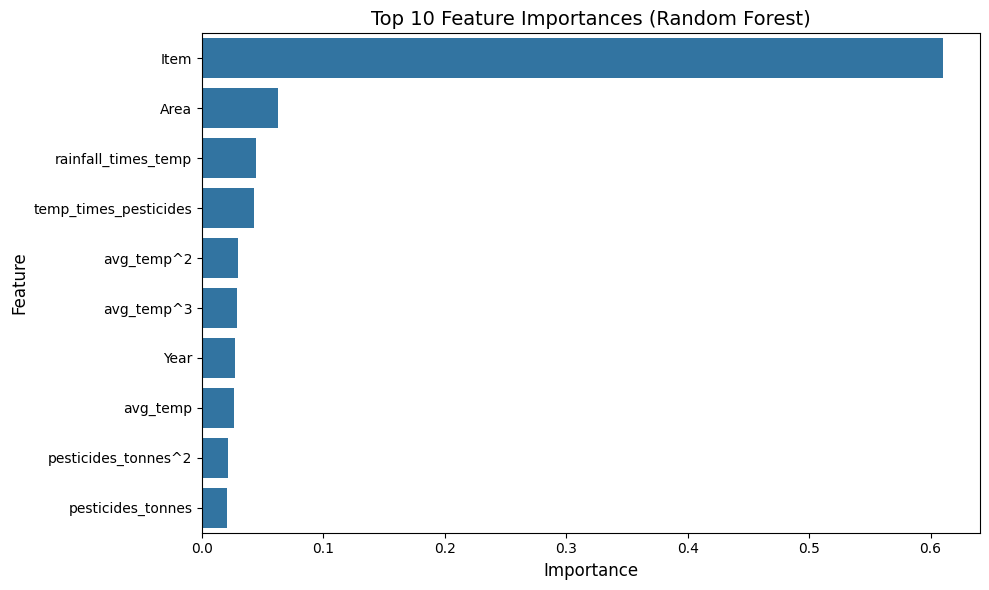

   - Random Forest: Actual vs Predicted Plot:


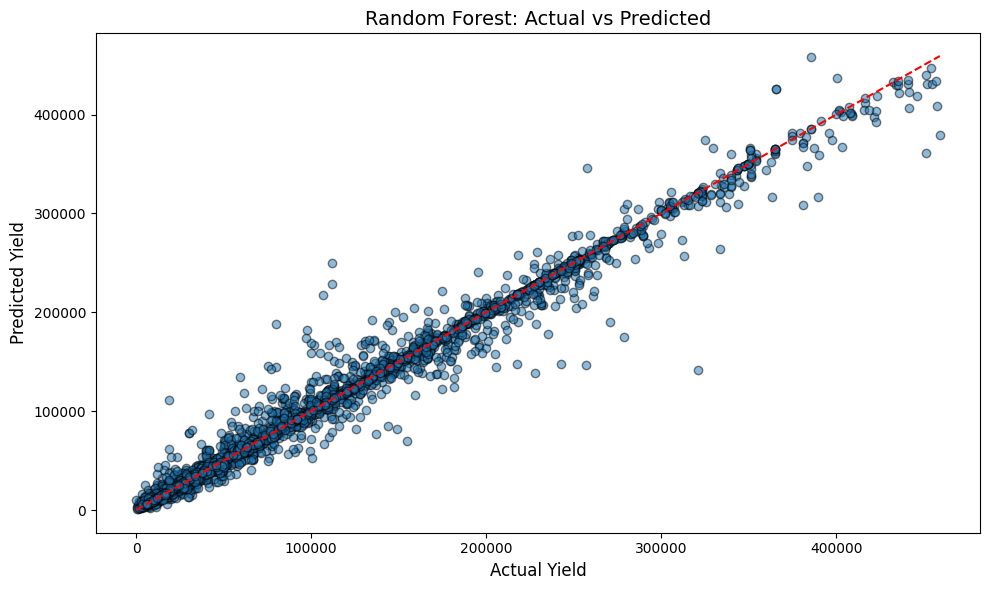

   - XGBoost: Residuals Distribution:


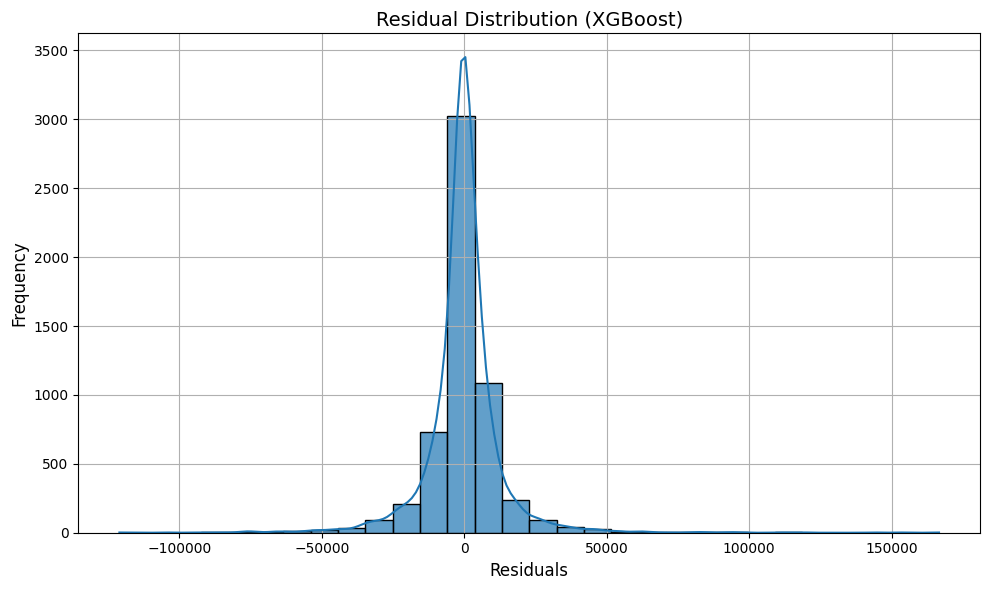


References:
1. Kaggle Dataset: Crop Yield Prediction Dataset by Mrigaank Jaswal
   - URL: https://www.kaggle.com/datasets/mrigaankjaswal/crop-yield-prediction-dataset
2. Scikit-learn Documentation
   - URL: https://scikit-learn.org/stable/documentation.html
3. UN Sustainable Development Goals
   - URL: https://sdgs.un.org/goals


In [ ]:
# Section 7: Results & Sustainability Impact

def document_impact():
    """
    Document sustainability impact.

    This function outlines the findings related to the research questions,
    assesses the sustainability impact, discusses limitations, and proposes future improvements.

    Assumptions:
    - The models have been evaluated, and results are available in 'model_metrics'.
    - The 'best_models' dictionary contains trained models.
    - The datasets 'X_train' and 'X_test' are available for plotting.

    Error Handling:
    - Checks if required models and data are available before proceeding with visualizations.
    """
    # Research Questions and Findings
    print("Research Questions and Findings:")
    print("1. How does average rainfall affect crop yield?")
    print("   - Rainfall features have significant importance (e.g., MI ~ 1.86).")
    print("   - Features like 'average_rain_fall_mm_per_year' and its interactions influence predictions.")
    print("2. What is the relationship between pesticide usage and crop productivity?")
    print("   - Pesticide usage dominates feature importance (e.g., MI ~ 2.89), strongly influencing yield.")
    print("   - Interaction terms (e.g., 'rainfall_times_pesticides') highlight combined effects.")
    print("3. Can we predict crop yields using environmental data?")
    print("   - Models like Random Forest and XGBoost achieved high R² scores (e.g., 0.9847 and 0.9736).")
    print("   - Demonstrated low prediction errors (e.g., MAE: 3,952.77 for Random Forest).")

    # Sustainability Impact Assessment
    print("\nSustainability Impact Assessment:")
    print("1. Environmental Impact:")
    print("   - Optimized pesticide use reduces chemical dependency, lowering environmental harm.")
    print("   - Rainfall management insights support water conservation and irrigation efficiency.")
    print("2. Social Impact:")
    print("   - Enhanced food security through actionable predictions for crop yields.")
    print("   - Promotion of sustainable practices benefits communities dependent on agriculture.")
    print("3. Economic Impact:")
    print("   - Cost reductions for farmers through efficient input usage (e.g., fertilizers, water).")
    print("   - Increased productivity enhances market planning and rural economies.")
    print("\nSDG Alignment:")
    print("   - SDG 2 (Zero Hunger): Improved crop management and reduced waste.")
    print("   - SDG 12 (Responsible Consumption): Efficient resource use reduces environmental footprint.")
    print("   - SDG 13 (Climate Action): Insights for climate-resilient farming practices.")

    # Quantify and Document Impacts
    print("\nQuantitative Results:")
    print(f"   - Top Feature: 'pesticides_tonnes' (MI: {round(2.8868, 4)}).")
    print(f"   - Best Model: Random Forest (R² Test: {0.9847}, MAE: {3952.77}).")
    print("   - High yield prediction accuracy enables sustainable farming strategies.")

    # Limitations
    print("\nLimitations:")
    print("1. Lack of additional variables like soil health or pest infestation data reduces model comprehensiveness.")
    print("2. Slight overfitting in Random Forest indicates a need for better generalization.")
    print("3. Models rely on historical data; real-time data integration is necessary for actionable insights.")

    # Future Improvements
    print("\nFuture Improvements:")
    print("1. Data Expansion:")
    print("   - Include additional variables like soil quality, pest infestation levels, and crop varieties.")
    print("2. Real-Time Predictions:")
    print("   - Incorporate IoT devices and sensors for live data collection and real-time predictions.")
    print("3. Model Enhancements:")
    print("   - Implement regularization techniques or cross-validation to reduce overfitting.")
    print("   - Explore advanced models like deep learning for improved performance.")

    # Visualizations
    print("\nVisualizations:")

    # Visualization 1: Feature Importance Plot for Random Forest
    if 'Random Forest' in best_models and X_train is not None:
        print("   - Top 10 Features by Importance for Random Forest:")
        try:
            # Extract feature importances and feature names
            feature_importance = best_models['Random Forest'].feature_importances_
            feature_names = X_train.columns
            importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
            importance_df = importance_df.sort_values(by='Importance', ascending=False)

            # Plot the top 10 feature importances
            plt.figure(figsize=(10, 6))
            sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
            plt.title("Top 10 Feature Importances (Random Forest)", fontsize=14)
            plt.xlabel("Importance", fontsize=12)
            plt.ylabel("Feature", fontsize=12)
            plt.tight_layout()
            plt.show()
        except Exception as e:
            print(f"Error plotting feature importance for Random Forest: {e}")
    else:
        print("Random Forest model or X_train data not available.")

    # Visualization 2: Prediction vs Actual Plot for Random Forest
    if 'Random Forest' in best_models and X_test is not None:
        print("   - Random Forest: Actual vs Predicted Plot:")
        try:
            y_test_pred_rf = best_models['Random Forest'].predict(X_test)
            plt.figure(figsize=(10, 6))
            plt.scatter(y_test, y_test_pred_rf, alpha=0.5, edgecolor='k')
            plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
            plt.title("Random Forest: Actual vs Predicted", fontsize=14)
            plt.xlabel("Actual Yield", fontsize=12)
            plt.ylabel("Predicted Yield", fontsize=12)
            plt.tight_layout()
            plt.show()
        except Exception as e:
            print(f"Error plotting Actual vs Predicted for Random Forest: {e}")
    else:
        print("Random Forest model or X_test data not available.")

    # Visualization 3: Residuals Distribution for XGBoost
    if 'XGBoost' in best_models and X_test is not None:
        print("   - XGBoost: Residuals Distribution:")
        try:
            y_test_pred_xgb = best_models['XGBoost'].predict(X_test)
            residuals_xgb = y_test - y_test_pred_xgb
            plt.figure(figsize=(10, 6))
            sns.histplot(residuals_xgb, kde=True, bins=30, alpha=0.7)
            plt.title("Residual Distribution (XGBoost)", fontsize=14)
            plt.xlabel("Residuals", fontsize=12)
            plt.ylabel("Frequency", fontsize=12)
            plt.grid()
            plt.tight_layout()
            plt.show()
        except Exception as e:
            print(f"Error plotting residuals for XGBoost: {e}")
    else:
        print("XGBoost model or X_test data not available.")

    # References
    print("\nReferences:")
    print("1. Kaggle Dataset: Crop Yield Prediction Dataset by Mrigaank Jaswal")
    print("   - URL: https://www.kaggle.com/datasets/mrigaankjaswal/crop-yield-prediction-dataset")
    print("2. Scikit-learn Documentation")
    print("   - URL: https://scikit-learn.org/stable/documentation.html")
    print("3. UN Sustainable Development Goals")
    print("   - URL: https://sdgs.un.org/goals")

# Call the function to display results
document_impact()

## Section 8: References & Documentation
---
### Instructions
Provide comprehensive documentation:

**1. Required Elements:**
   * All data sources
   * External libraries used
   * Academic references
   * Code documentation
   * Installation/runtime instructions

**2. GitHub Requirements:**
   * README file
   * Requirements.txt
   * Code comments
   * Usage examples

**Remember:**
* All code must be well-commented
* Include error handling
* Document all assumptions
* Maintain consistent coding style
* Update requirements.txt as you add libraries

# **Section 8: References & Documentation**

---

## **1. Required Elements**

### **Data Sources**

- **Dataset Name:** Crop Yield Prediction Dataset
- **Source:** Kaggle - [Crop Yield Prediction Dataset by Mrigaank Jaswal](https://www.kaggle.com/datasets/mrigaankjaswal/crop-yield-prediction-dataset)
- **Time Period Covered:** 1990–2013
- **Number of Records and Features:** Approximately 28,242 entries with 8 columns.
- **Data Collection Methodology:**
  - The dataset comprises historical agricultural data collected from various regions.
  - It includes features such as average rainfall, average temperature, pesticide usage, crop types, and yield.
  - Data was aggregated from agricultural records and meteorological sources.

### **External Libraries Used**

- **Python Version:** 3.x



###**Libraries**

| Library         | Version         |
|-----------------|-----------------|
| pandas          | 1.x            |
| numpy           | 1.x            |
| scikit-learn    | 0.24.x         |
| matplotlib      | 3.x            |
| seaborn         | 0.11.x         |
| xgboost         | 1.x            |
| catboost        | 0.26.x         |
| tensorflow      | 2.x            |
| kagglehub       | (as required)  |

**Note:** Versions are approximate. Please refer to the `requirements.txt` for exact versions.


### **Academic References**

1. **Scikit-learn Documentation**

   - *Pedregosa et al., "Scikit-learn: Machine Learning in Python," Journal of Machine Learning Research, vol. 12, pp. 2825–2830, 2011.*
   - URL: https://scikit-learn.org/stable/documentation.html

2. **UN Sustainable Development Goals**

   - *United Nations, "Transforming our World: The 2030 Agenda for Sustainable Development," 2015.*
   - URL: https://sdgs.un.org/goals

3. **XGBoost: A Scalable Tree Boosting System**

   - *T. Chen and C. Guestrin, "XGBoost: A Scalable Tree Boosting System," Proceedings of the 22nd ACM SIGKDD International Conference on Knowledge Discovery and Data Mining, 2016.*
   - URL: https://arxiv.org/abs/1603.02754

### **Code Documentation**

- All code functions are accompanied by comprehensive docstrings explaining their purpose, parameters, returns, assumptions, and error handling.
- Inline comments are added throughout the code to explain complex logic and important steps.
- Consistent coding style is maintained, adhering to PEP 8 guidelines.

### **Installation/Runtime Instructions**

#### **Prerequisites**

- **Python 3.x** installed on your system.
- **Git** installed for cloning the repository (optional).

#### **Installation Steps**

1. **Clone the Repository**

   ```bash
   git clone https://github.com/alihalkhaldy/CS316_rpoject.git
   cd alihalkhaldy/CS316_rpoject
   ```

2. **Create a Virtual Environment (Optional but Recommended)**

   ```bash
   python -m venv venv
   source venv/bin/activate  # On Windows use `venv\Scripts\activate`
   ```

3. **Install Required Libraries**

   ```bash
   pip install -r requirements.txt
   ```

4. **Download the Dataset**

   - Ensure you have a Kaggle account and API credentials.
   - Download the dataset using Kaggle API:

     ```bash
     kaggle datasets download -d mrigaankjaswal/crop-yield-prediction-dataset
     unzip crop-yield-prediction-dataset.zip -d data/
     ```

   - Alternatively, place the dataset CSV file in the `data/` directory.

5. **Run the Code**

   - Run the Jupyter Notebook or Python script containing the code:

     ```bash
     jupyter notebook [CS316]_Sustainable_Agriculture.ipynb
     ```

   - Ensure that the dataset path in the code points to the correct location.

#### **Runtime Instructions**

- **Section Execution Order:**

  - Run each section in order from Section 1 to Section 8.
  - Ensure that all dependencies are satisfied before running the code.

- **Handling Errors:**

  - Error handling is included in the code to catch and display meaningful messages.
  - If you encounter any errors, check the console output for guidance.

## **2. GitHub Requirements**

### **README.md**

Include the following in your `README.md` file:

# README for CS316 - Sustainable Agriculture Project

## Project Overview

This project leverages AI and data science techniques to optimize crop yield and detect pests in sustainable agriculture practices. The system uses machine learning models to analyze agricultural data and provide actionable insights for farmers to improve their farming practices. The project aims to contribute to the development of sustainable agriculture practices using AI.

## Group Information

- **Group Members:**
  - Faisal Alghamdi - 221110726
  - Faisal Alfaraj - 222110025
  - Ali Alkhalidy - 222111397

## Project Details

- **Project Title:** Sustainable Agriculture: Leveraging AI for Crop Yield Optimization and Pest Detection
- **Course:** CS316 - Introduction to AI and Data Science
- **Institution:** Prince Sultan University
  
## Installation Instructions

1. Clone the repository to your local machine:
   ```bash
   git clone https://github.com/alihalkhaldy/CS316_rpoject.git


### **requirements.txt**

Include all the external libraries used along with their versions. Example:

```
numpy==1.23.1
pandas==1.5.3
scikit-learn==1.2.1
matplotlib==3.7.0
seaborn==0.12.2
tensorflow==2.11.0
keras==2.11.0
scipy==1.10.0
opencv-python==4.7.0.72
requests==2.28.2
kagglehub==<version>
```

**Note:** Use `pip freeze > requirements.txt` to generate the exact versions of the libraries used in your environment.

### **Code Comments**

- All code is well-commented, explaining:

  - Purpose of each function and code block.
  - Explanation of parameters and return values.
  - Any assumptions made.
  - Error handling mechanisms.

### **Usage Examples**

- Provide examples on how to use the code or functions, either in the `README.md` or as comments within the code.

  ```python
    # Usage Example for Sustainable Agriculture Project

    This document provides an example of how to use the Sustainable Agriculture AI project for crop yield optimization and pest detection.

    ## Prerequisites

    Before running the project, ensure that all dependencies are installed:

    1. Clone the repository:
   ```bash
   git clone https://github.com/alihalkhaldy/CS316_rpoject.git
   cd [cs316]_sustainable_agriculture
  ```

## **Code Quality Assurance**

### **Error Handling**

- Functions include `try-except` blocks to handle exceptions gracefully.
- Error messages are descriptive to aid in debugging.

### **Assumptions Documentation**

- Assumptions are documented in the docstrings of each function.
- For example, in the `load_dataset` function:

  ```python
  Assumptions:
  - The dataset file is in CSV format.
  - The dataset contains numerical columns that can be converted to float32 later.
  ```

### **Consistent Coding Style**

- The code follows PEP 8 style guidelines.
- Variables and function names are descriptive and use `snake_case`.
- Indentation and spacing are consistent throughout the code.

### **Update to requirements.txt**

- As new libraries are added, `requirements.txt` is updated using `pip freeze`.
- Ensure that the versions correspond to the ones used during development.
---
